# Estimation de paramètres modèles par apprentissage en hydrologie spatiale 
## Analyse Statistique - HYDROSWOT

### I - Imports

In [1]:
library(corrplot)
library(ggplot2)
library(FactoMineR)
library(factoextra)

corrplot 0.84 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### II - Données

In [2]:
path <- "../databases/HYDROSWOT_100m_V3.csv"
river <- read.csv(path, header = TRUE, sep = ";", quote = "\"", dec = ".", fill = TRUE, comment.char = "")

### III - Variables

* **site_no** : site number (int), source HydroSWOT data
* **station_name** : station name (str), source HydroSWOT data
* **river** : River name (str) extracted from station_name, source HYDRoSWOT data
* **stream type** : Type of stream (str) extracted from station_name, source HYDRoSWOT data
* **lon** : longitude (float, deg), source HydroSWOT data
* **lat** : latitude (float, deg), source HydroSWOT data
* **flowacc** : flow accumulation (float, km2), i.e. size of the upstream watershed, source MERIT-Hydro
* **stage** : stage (float, m), source HydroSWOT data
* **W** : free surface top width (float, m), source HydroSWOT data
* **dH** : water depth above unobserved flow (float, m), source HydroSWOT data
* **dA** : cross-sectional flow area above A0 (float, m2), source HydroSWOT data
* **U** : flow velocity (float, m/s), source HydroSWOT data
* **A0** : minimal (unobserved) flow area (float, m2), source HYDRoSWOT data
* **Abar** : mean flow area (float, m2), source HYDRoSWOT data
* **Amed** : median flow area (float, m2), source HYDRoSWOT data
* **Sdem** : terrain slope (m/m) computed from MERIT Digital Elevation Model, source MERIT-Basins
* **clay** : percentage of clay in the floodplain (float, %), source ISRIC SoilGrids
* **sand** : percentage of sand in the floodplain (float, %), source ISRIC SoilGrids
* **silt** : percentage of sile in the floodplain (float, %), source ISRIC SoilGrids
* **PA** : mean annual precipitation (float, mm), source WORLDCLIM 1.4 Bio data
* **TA** : mean annual temperature (float, °C), source WORLDCLIM 1.4 Bio data
* **LC1** : Evergreen/Deciduous Needleleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC2** : Evergreen Broadleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC3** : Deciduous Broadleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC4** : Mixed/Other Trees (float, %), source Global 1-km Consensus Land Cover
* **LC5** : Shrubs (float, %), source Global 1-km Consensus Land Cover
* **LC6** : Herbaceous Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC7** : Cultivated and Managed Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC8** : Regularly Flooded Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC9** : Urban/Built-up (float, %), source Global 1-km Consensus Land Cover
* **LC10** : Snow/Ice (float, %), source Global 1-km Consensus Land Cover
* **LC11** : Barren (float, %), source Global 1-km Consensus Land Cover
* **LC12** : Open Water (float, %), source Global 1-km Consensus Land Cover
* **Q5_GSCD** : 5-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q10_GSCD** : 10-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q20_GSCD** : 20-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **QMEAN_GSCD** : mean discharge quantile (float, ??), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q80_GSCD** : 80-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q90_GSCD** : 90-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q95_GSCD** : 95-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q** : discharge (float, m3/s), source HydroSWOT data

### IV - Première approche

In [3]:
dim(river)
head(river, 5)

[1] 16637    41

site_no station_name                                  river      stream_type
1 2419890 TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS TALLAPOOSA river      
2 2419890 TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS TALLAPOOSA river      
3 2419890 TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS TALLAPOOSA river      
4 2419890 TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS TALLAPOOSA river      
5 2419890 TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS TALLAPOOSA river      
  lon    lat   flowacc  stage    W        dH       ⋯ LC11 LC12 Q5_GSCD 
1 -86.19 32.43 12033.08 1.527048 125.8824 0.999744 ⋯ 0    0    46314.13
2 -86.19 32.43 12033.08 8.909304 152.0952 8.382000 ⋯ 0    0    46314.13
3 -86.19 32.43 12033.08 1.271016 116.4336 0.743712 ⋯ 0    0    46314.13
4 -86.19 32.43 12033.08 2.752344 112.1664 2.225040 ⋯ 0    0    46314.13
5 -86.19 32.43 12033.08 2.173224 120.3960 1.645920 ⋯ 0    0    46314.13
  Q10_GSCD Q20_GSCD QMEAN_GSCD Q80_GSCD Q90_GSCD Q95_GSCD Q         
1 27537.17 16147.6  5236103    2545.144 1831.074 1303.981   76.17232
2 27537.17 16147.6  5236103    2545.144 1831.074 1303.981 1486.63445
3 27537.17 16147.6  5236103    2545.144 1831.074 1303.981   46.15646
4 27537.17 16147.6  5236103    2545.144 1831.074 1303.981  150.64562
5 27537.17 16147.6  5236103    2545.144 1831.074 1303.981  140.16839

In [4]:
riverQ = river[river$Q>100,]
dim(riverQ)
summary(riverQ)

[1] 12222    41

    site_no                                                   station_name 
 Min.   :1.010e+06   Missouri River at Omaha, NE                    : 606  
 1st Qu.:5.082e+06   Missouri River at Decatur, NE                  : 570  
 Median :6.479e+06   Missouri River at Sioux City, IA               : 570  
 Mean   :5.533e+11   Missouri River at Waverly, MO                  : 316  
 3rd Qu.:7.010e+06   Missouri River at Boonville, MO                : 274  
 Max.   :3.220e+14   SAVANNAH R AT BURTONS FERRY BR NR MILLHAVEN, GA: 212  
                     (Other)                                        :9674  
         river      stream_type         lon               lat       
 Missouri   :3000   bayou :    7   Min.   :-123.25   Min.   :28.30  
 Mississippi: 995   creek :   14   1st Qu.: -96.24   1st Qu.:37.95  
 Des Moines : 479   cut   :    9   Median : -92.60   Median :41.10  
 SNAKE      : 428   river :12108   Mean   : -93.52   Mean   :40.35  
 SAVANNAH   : 406   slough:   84   3rd Qu.: -89

#### Résumé des variables importantes  

* **Q** : mean = 1529.3 ; min = 100.2 ; max = 40661.08
* **flowacc** : mean = 305580.0 ; min = 339.3 ; max = 2929652.1
* **W** : mean = 213.35 ; min = 10.22 ; max = 3291.84
* **dH** : mean = 2.1342 ; min = 0.0 ; max = 1422.3157 (outlier extrême)
* **dA** : mean = 504.42 ; min = 0.0; max = 183221.79 (outlier extrême)

#### Moyenne rivière par rivière

In [72]:
meansRiver=aggregate(riverQ$Q, list(River = riverQ$river), mean)
summary(meansRiver)

       River           x         
   White  :  1   Min.   : 102.6  
  Arkansas:  1   1st Qu.: 300.9  
  White   :  1   Median : 415.6  
 ALABAMA  :  1   Mean   : 650.9  
 Allegheny:  1   3rd Qu.: 632.8  
 ALTAMAHA :  1   Max.   :7888.5  
 (Other)  :147                   

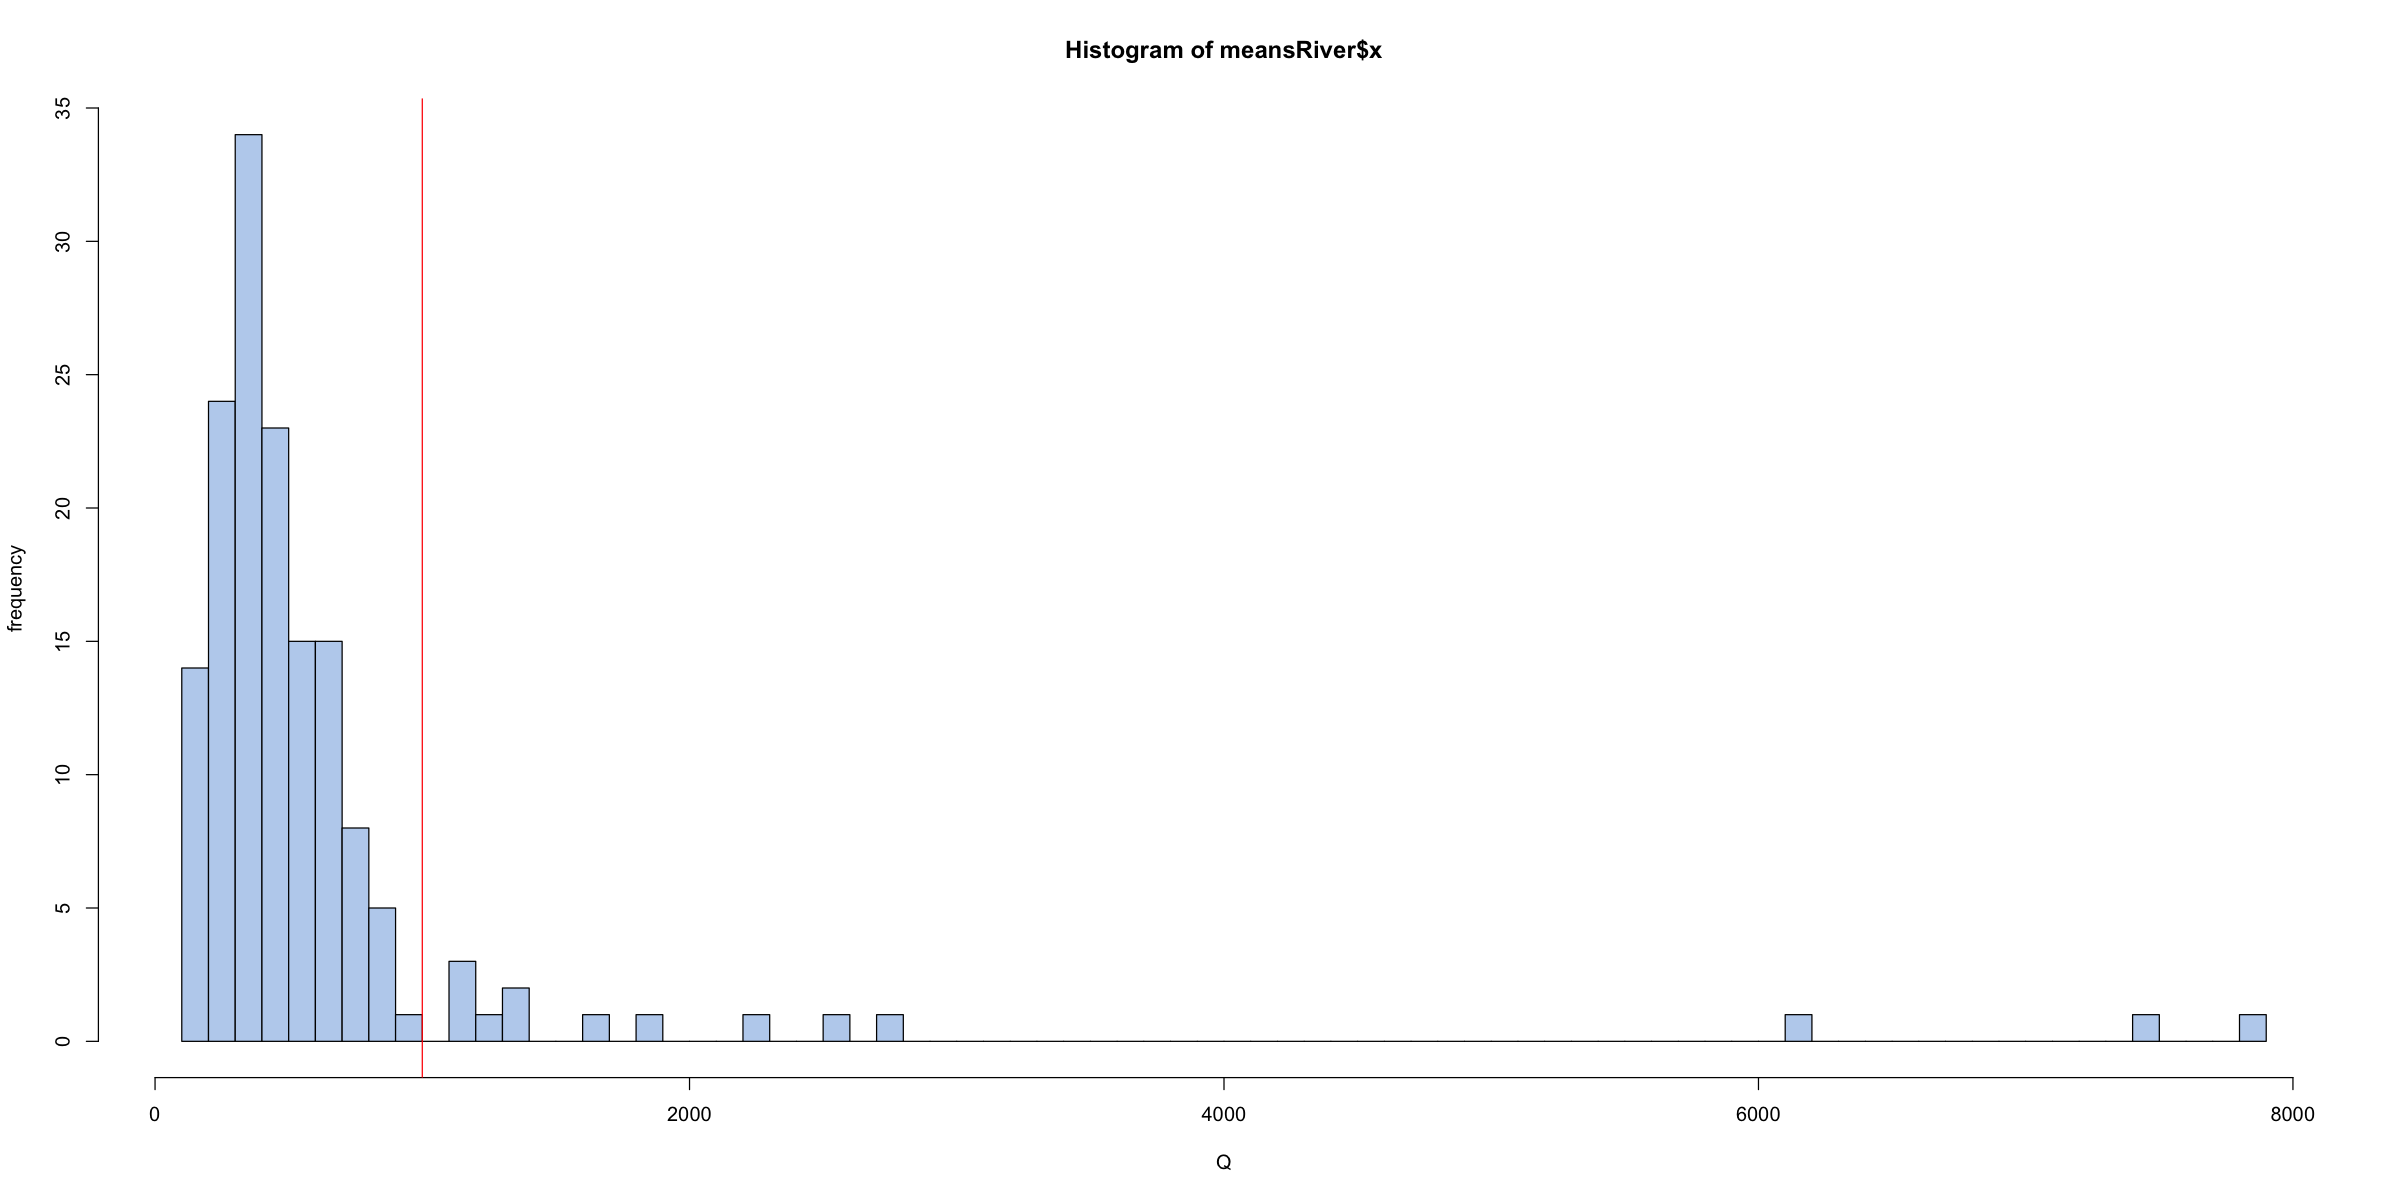

In [19]:
options(repr.plot.width=20, repr.plot.height=10)
hist(meansRiver$x, xlab="Q", ylab="frequency", col="lightsteelblue2", breaks=100)
abline(v=1000, col="red")

#### Séparation en deux groupes de rivières en fonction du débit

In [24]:
riverHNLQ = meansRiver[meansRiver$x <= 1000,]#High Number, Low Q
riverLNHQ = meansRiver[meansRiver$x > 1000,]#Low Number, High Q
dim(riverHNLQ)
dim(riverLNHQ)

[1] 139   2

[1] 14  2

#### Boxplot en fonction des rivières

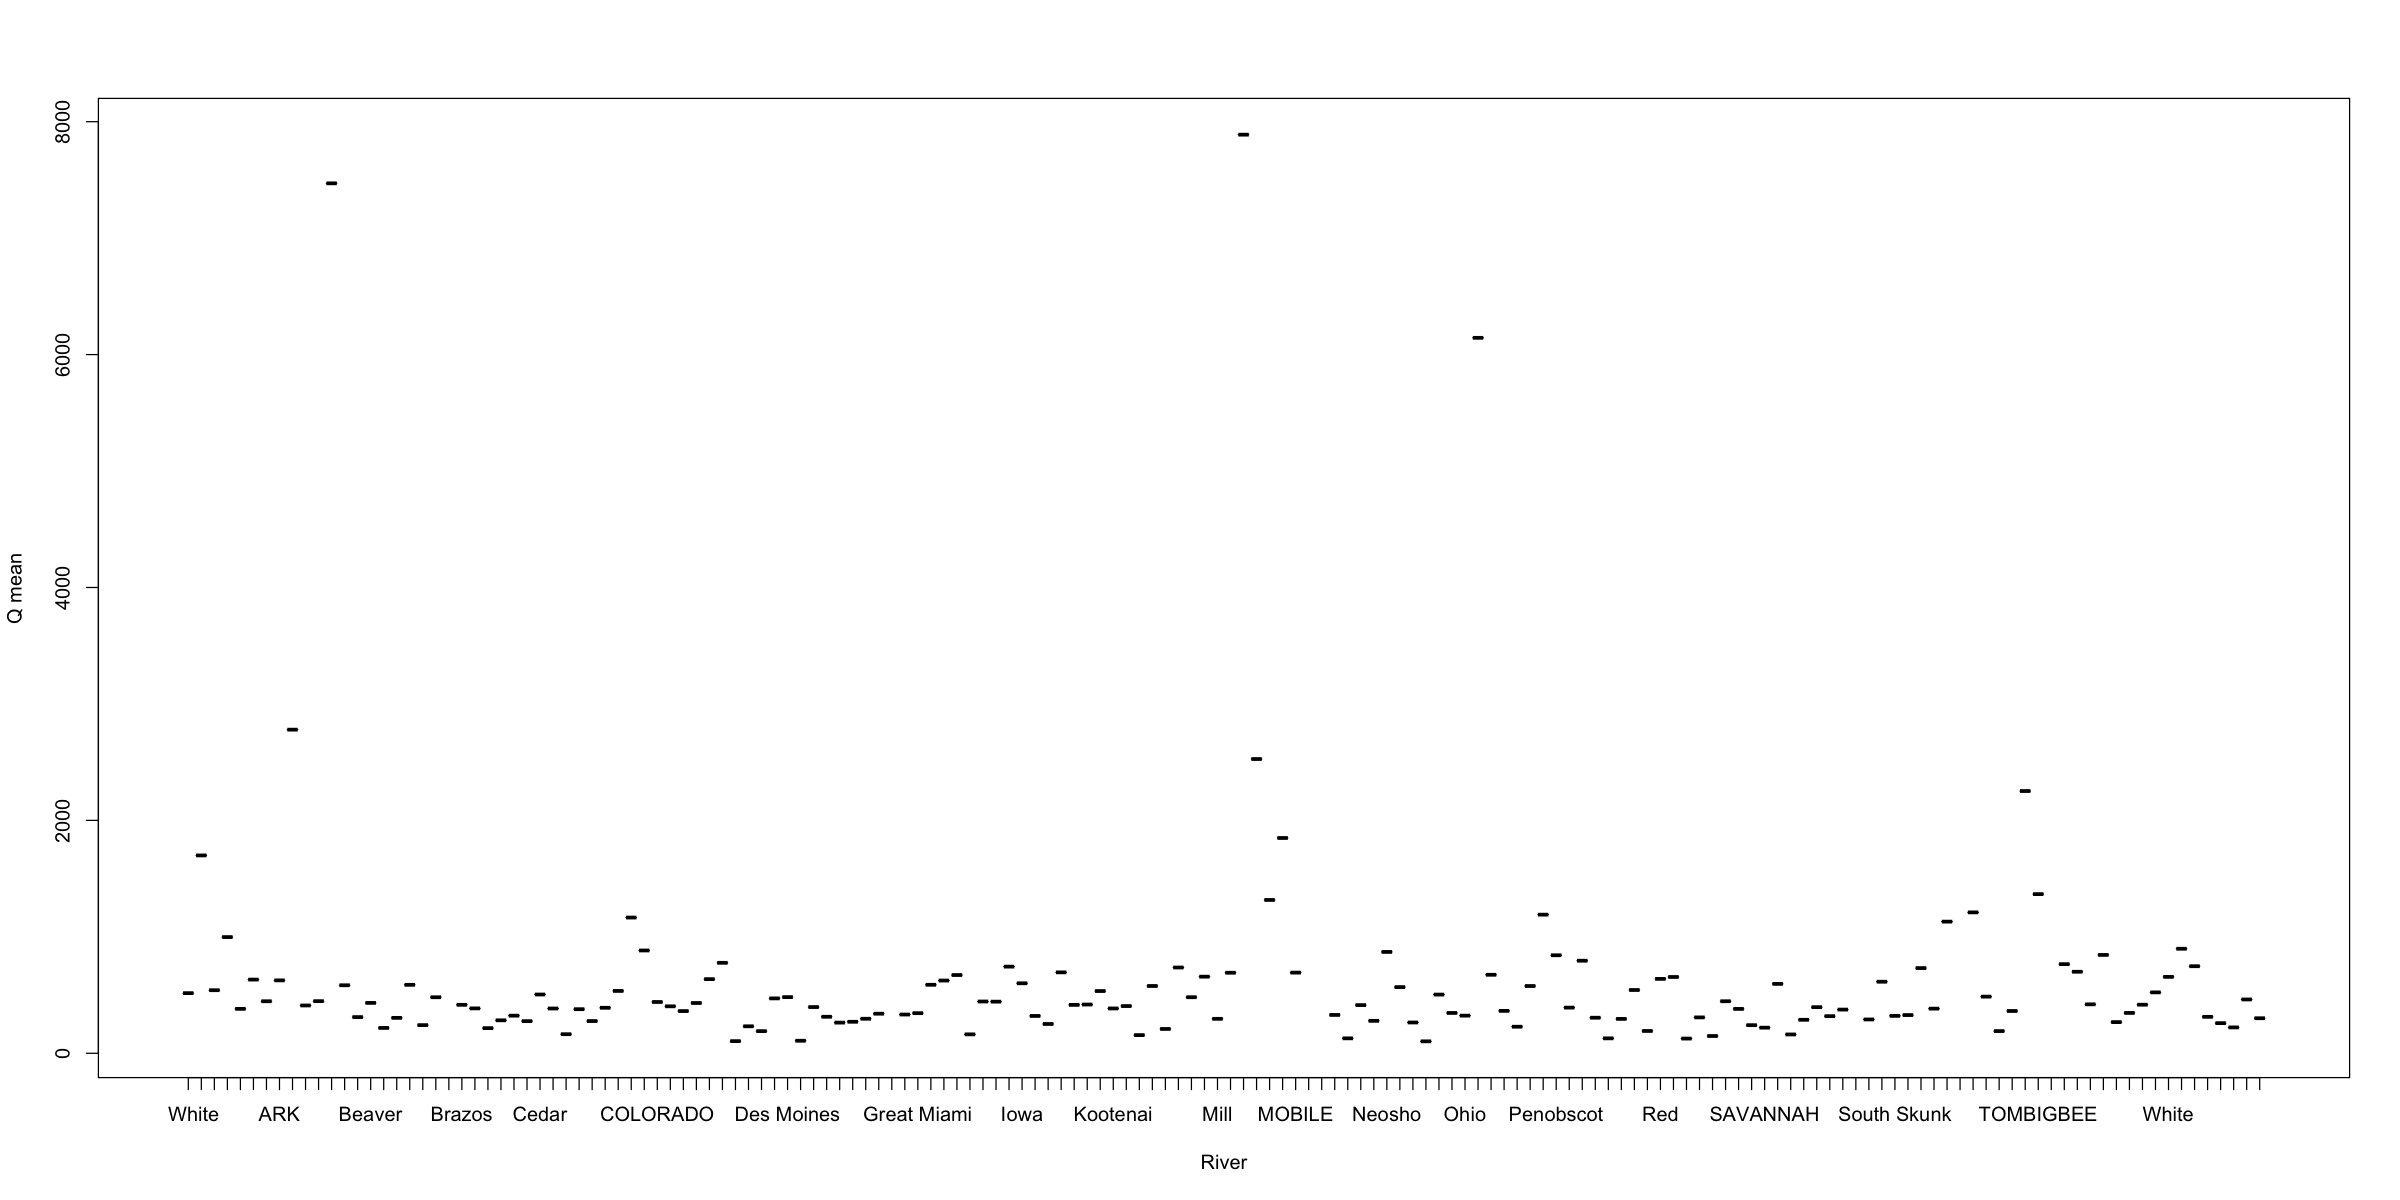

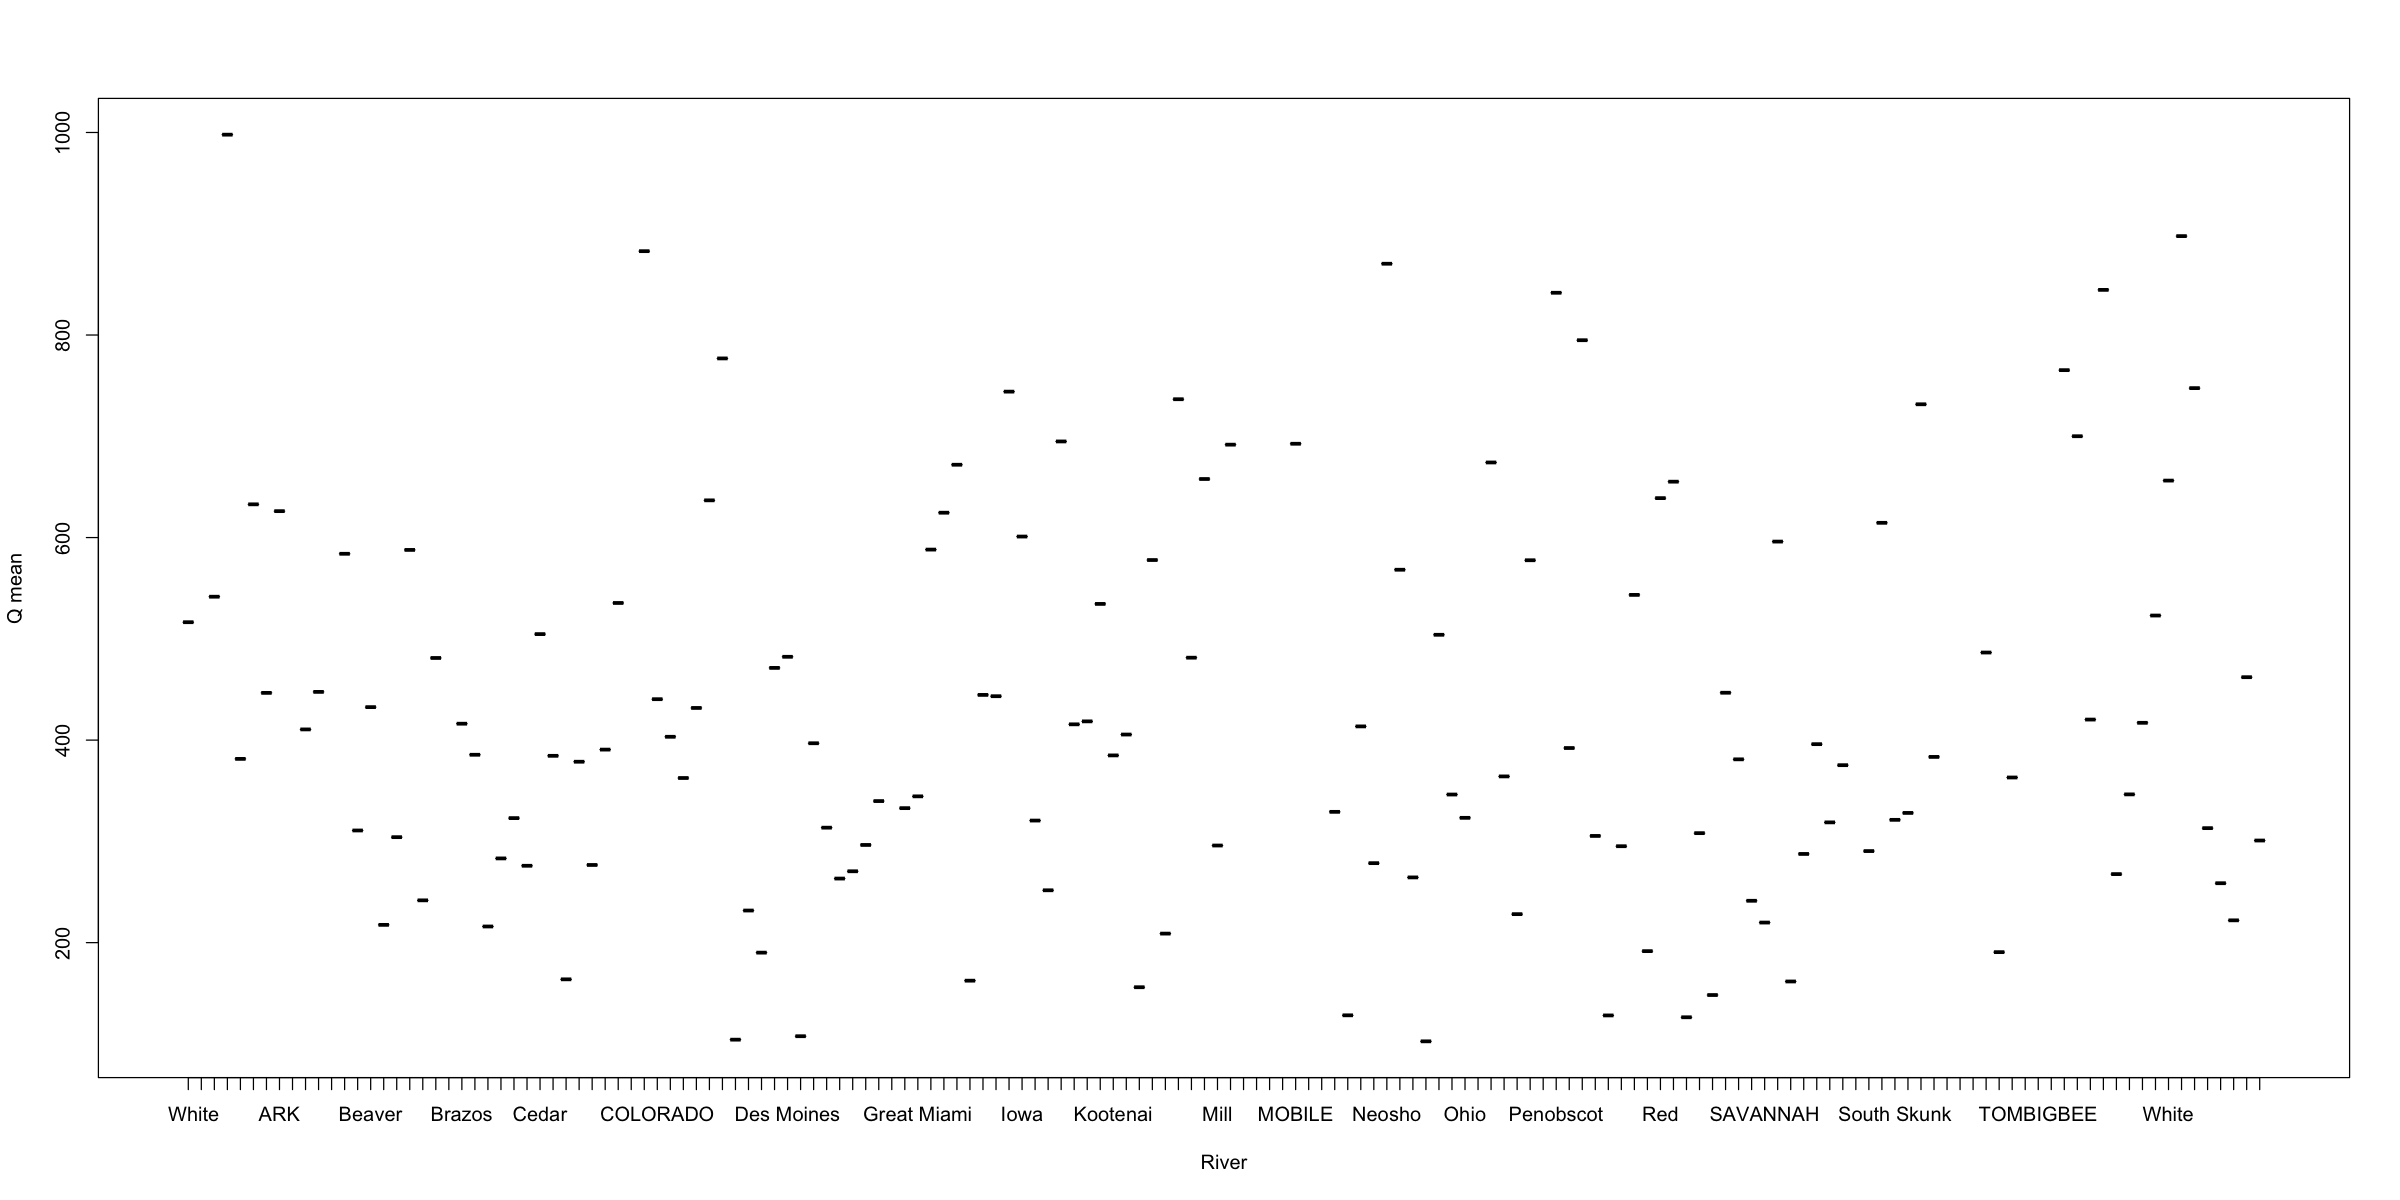

In [40]:
options(repr.plot.width=20, repr.plot.height=10)
plot(meansRiver$River, meansRiver$x, xlab="River", ylab="Q mean")
boxplot(riverHNLQ$x ~ riverHNLQ$River, xlab="River", ylab="Q mean")
boxplot(riverLNHQ$x ~ riverLNHQ$River, xlab="River", ylab="Q mean")
#boxplot(meansRiver$x ~ meansRiver$River, xlab="site_no", ylab="Q", col="lightsteelblue2")

#### Boxplot en fonction des site_no

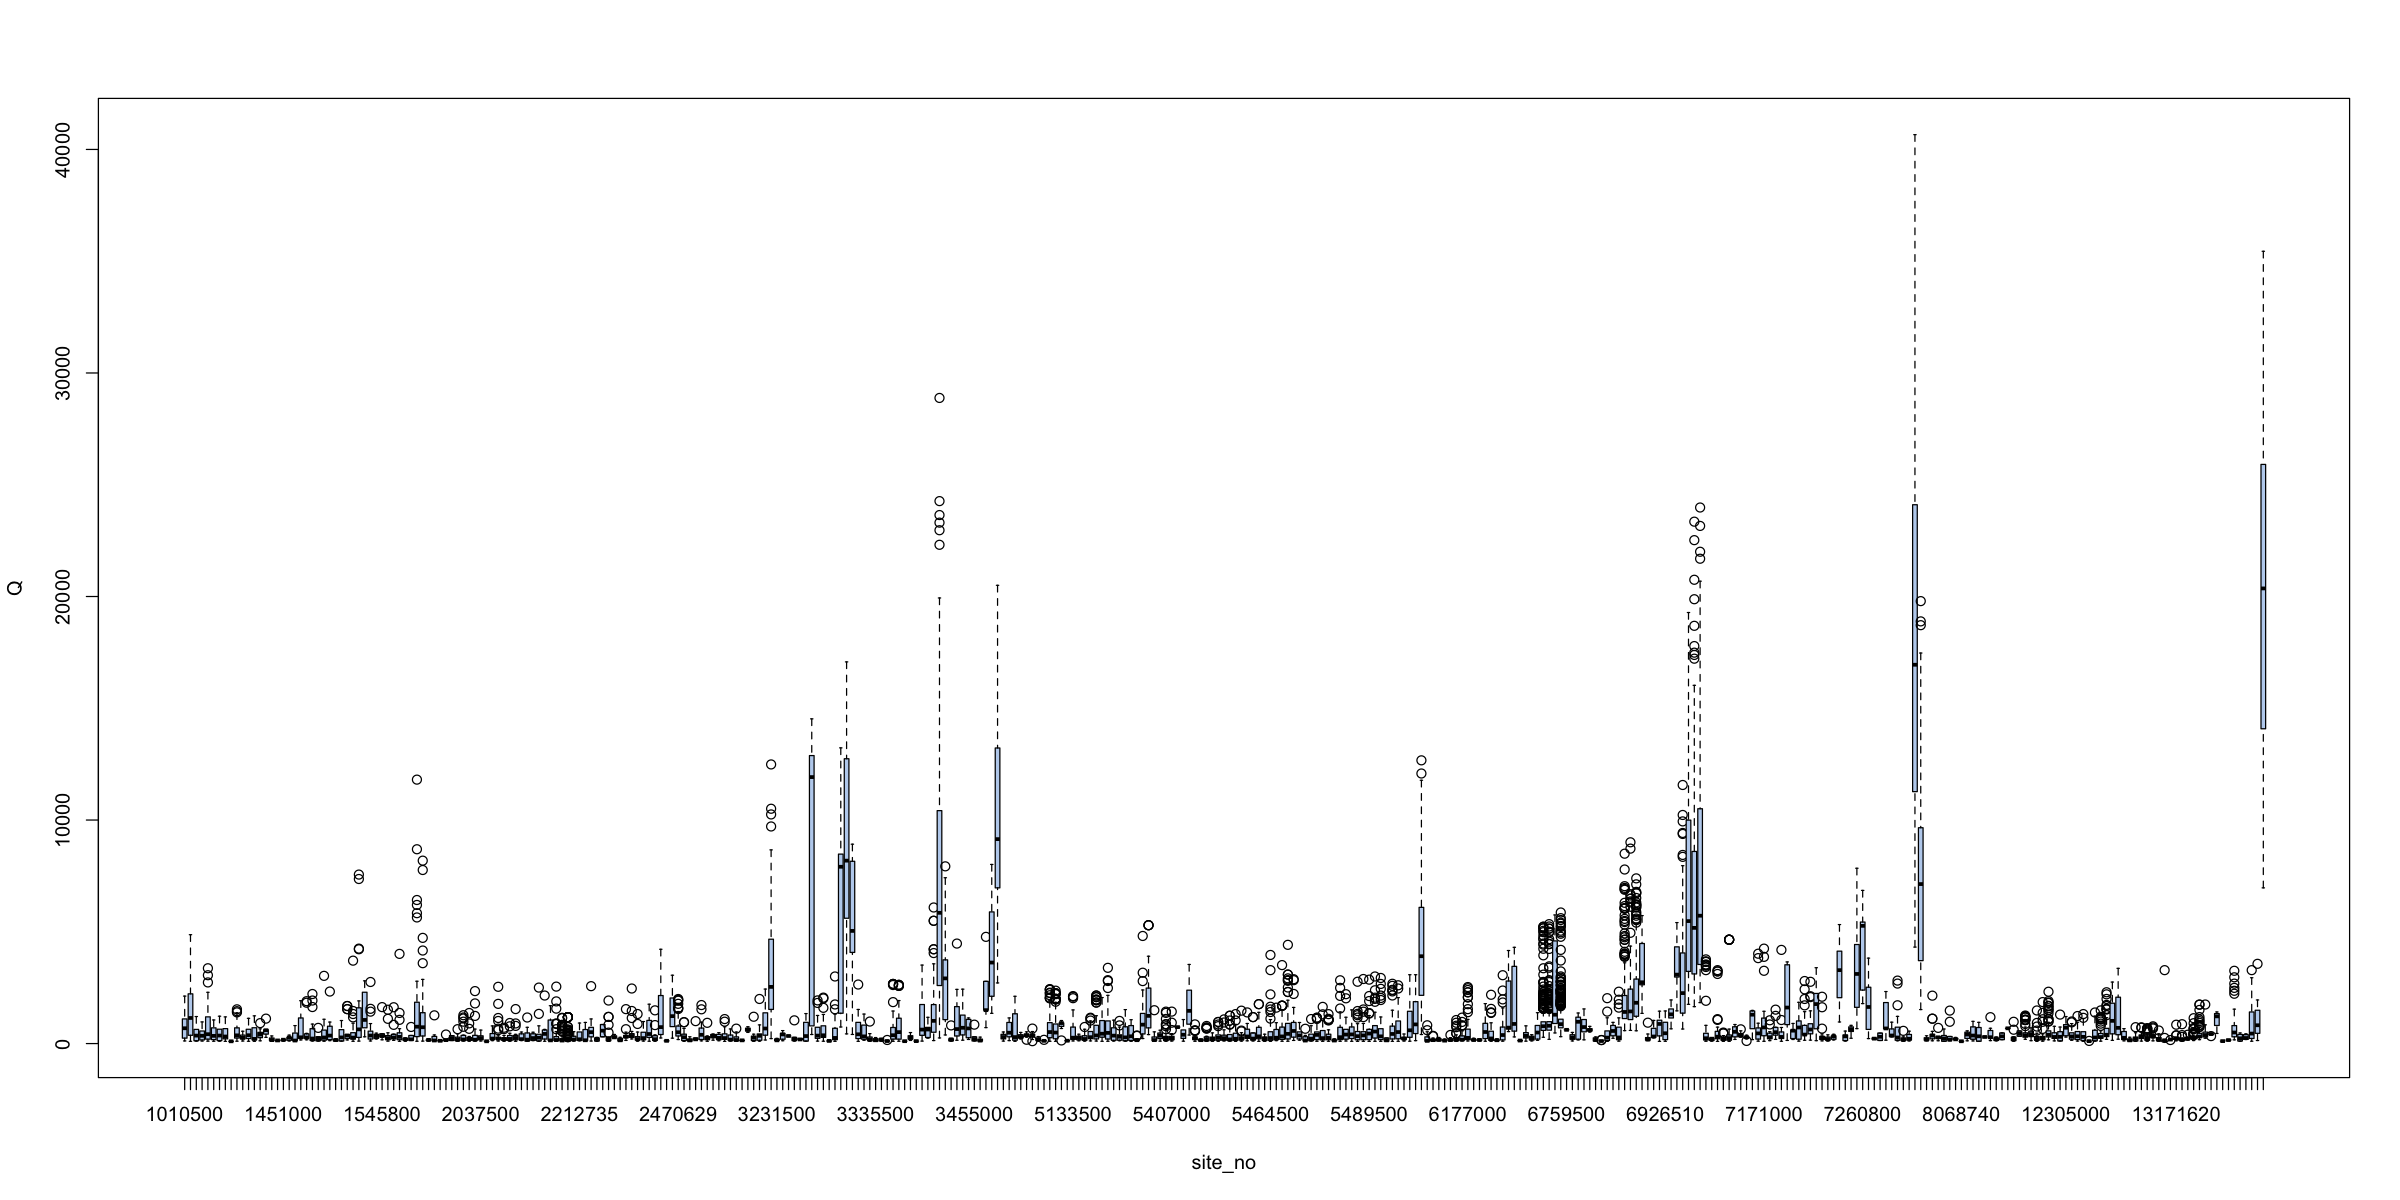

In [51]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverQ$Q ~ riverQ$site_no, xlab="site_no", ylab="Q", col="lightsteelblue2")

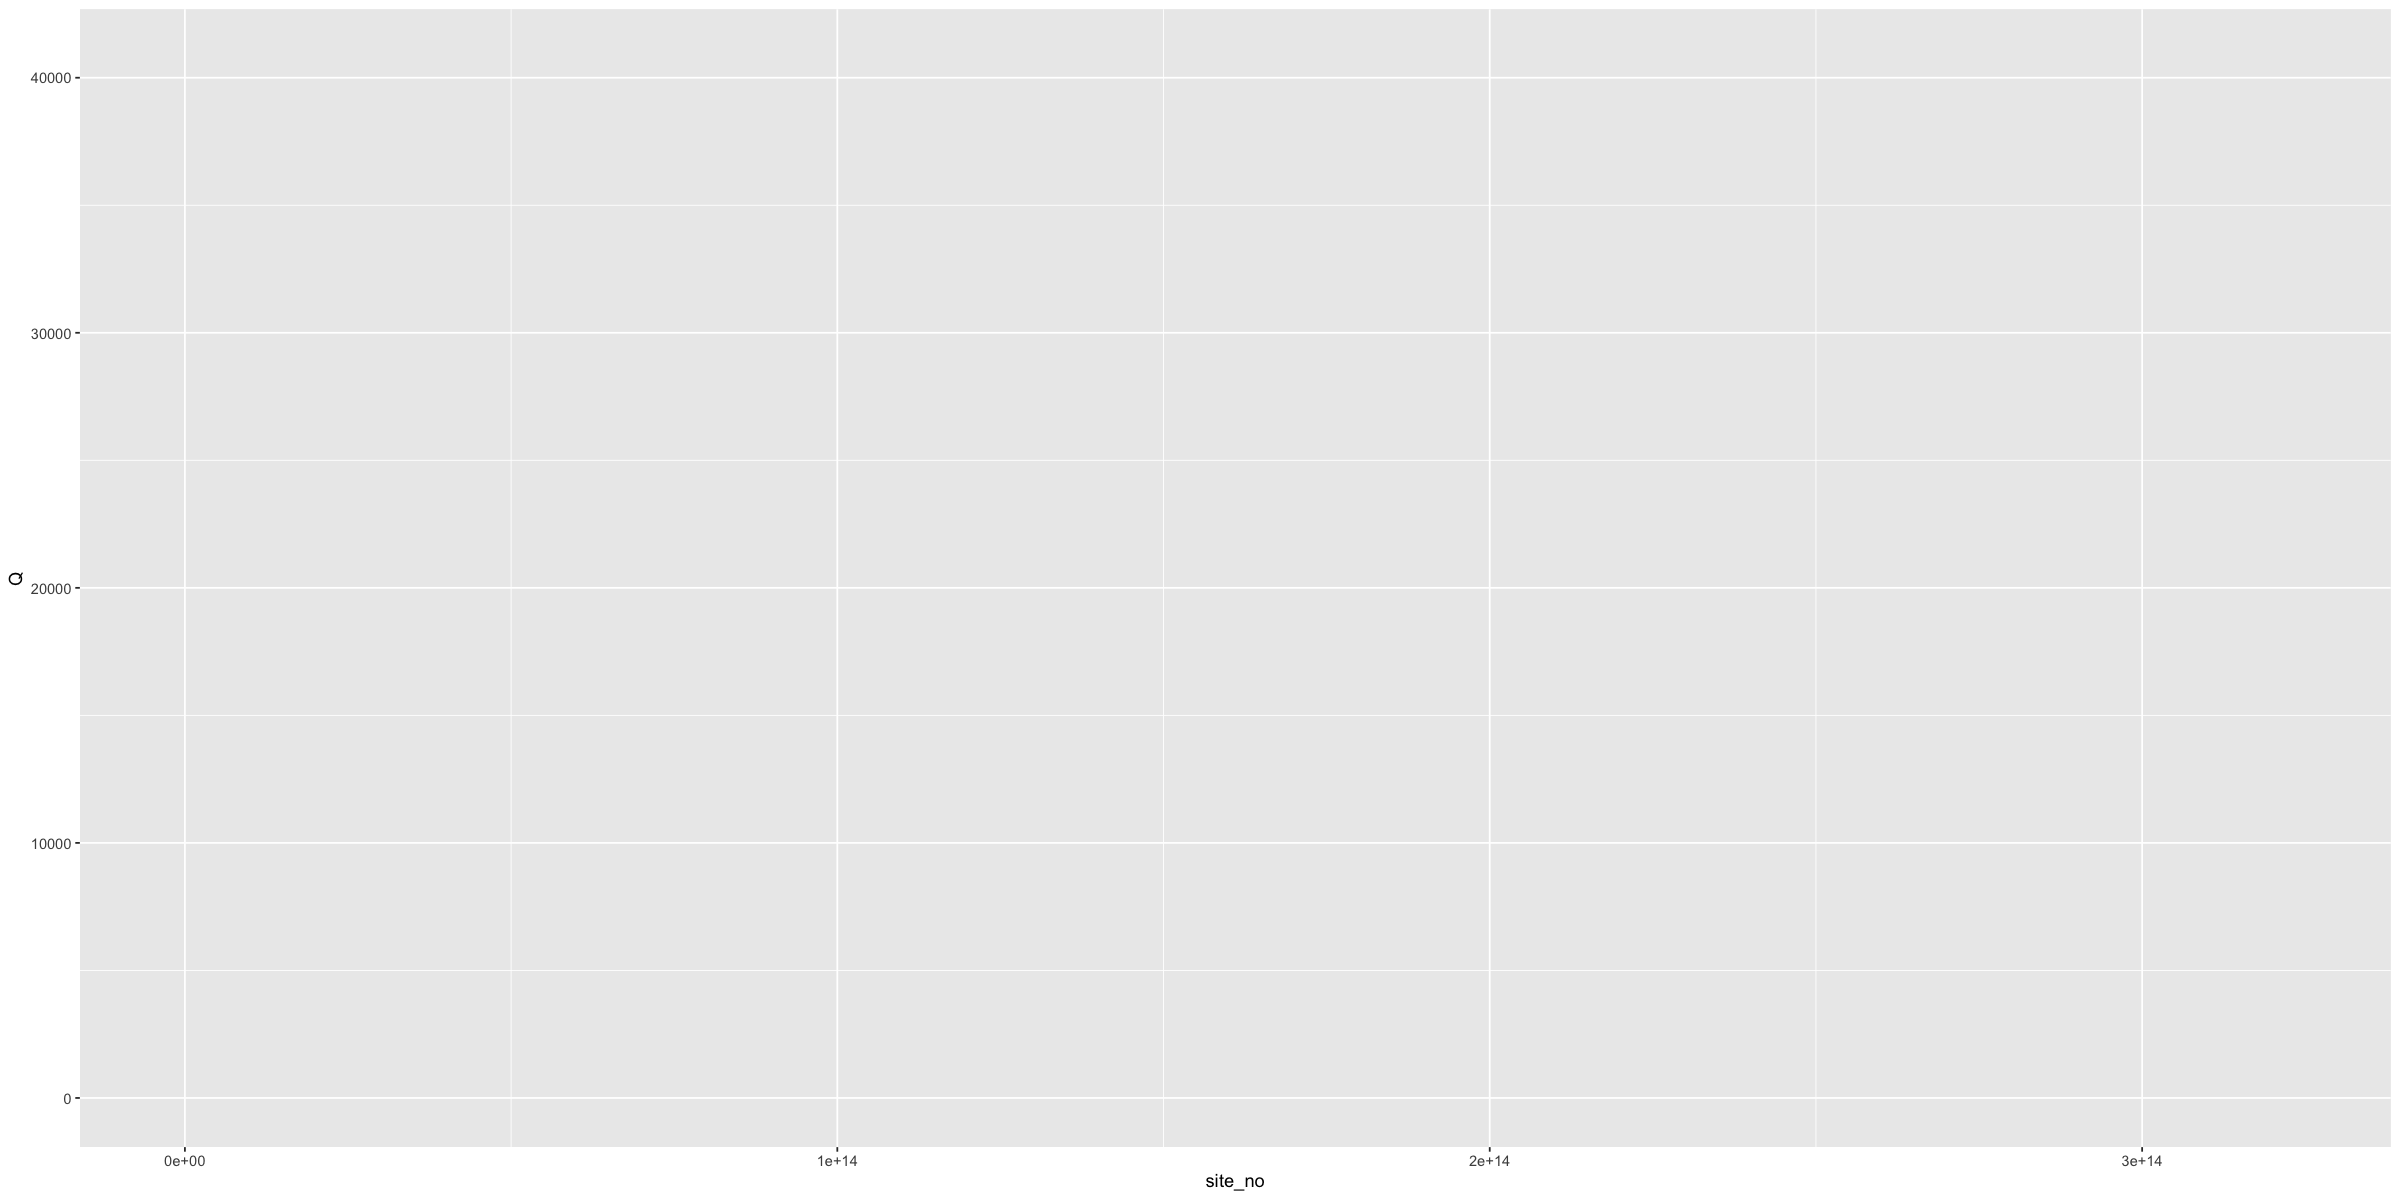

In [52]:
ggplot(riverQ, aes(x = site_no, y = Q), + 
       geom_boxplot())

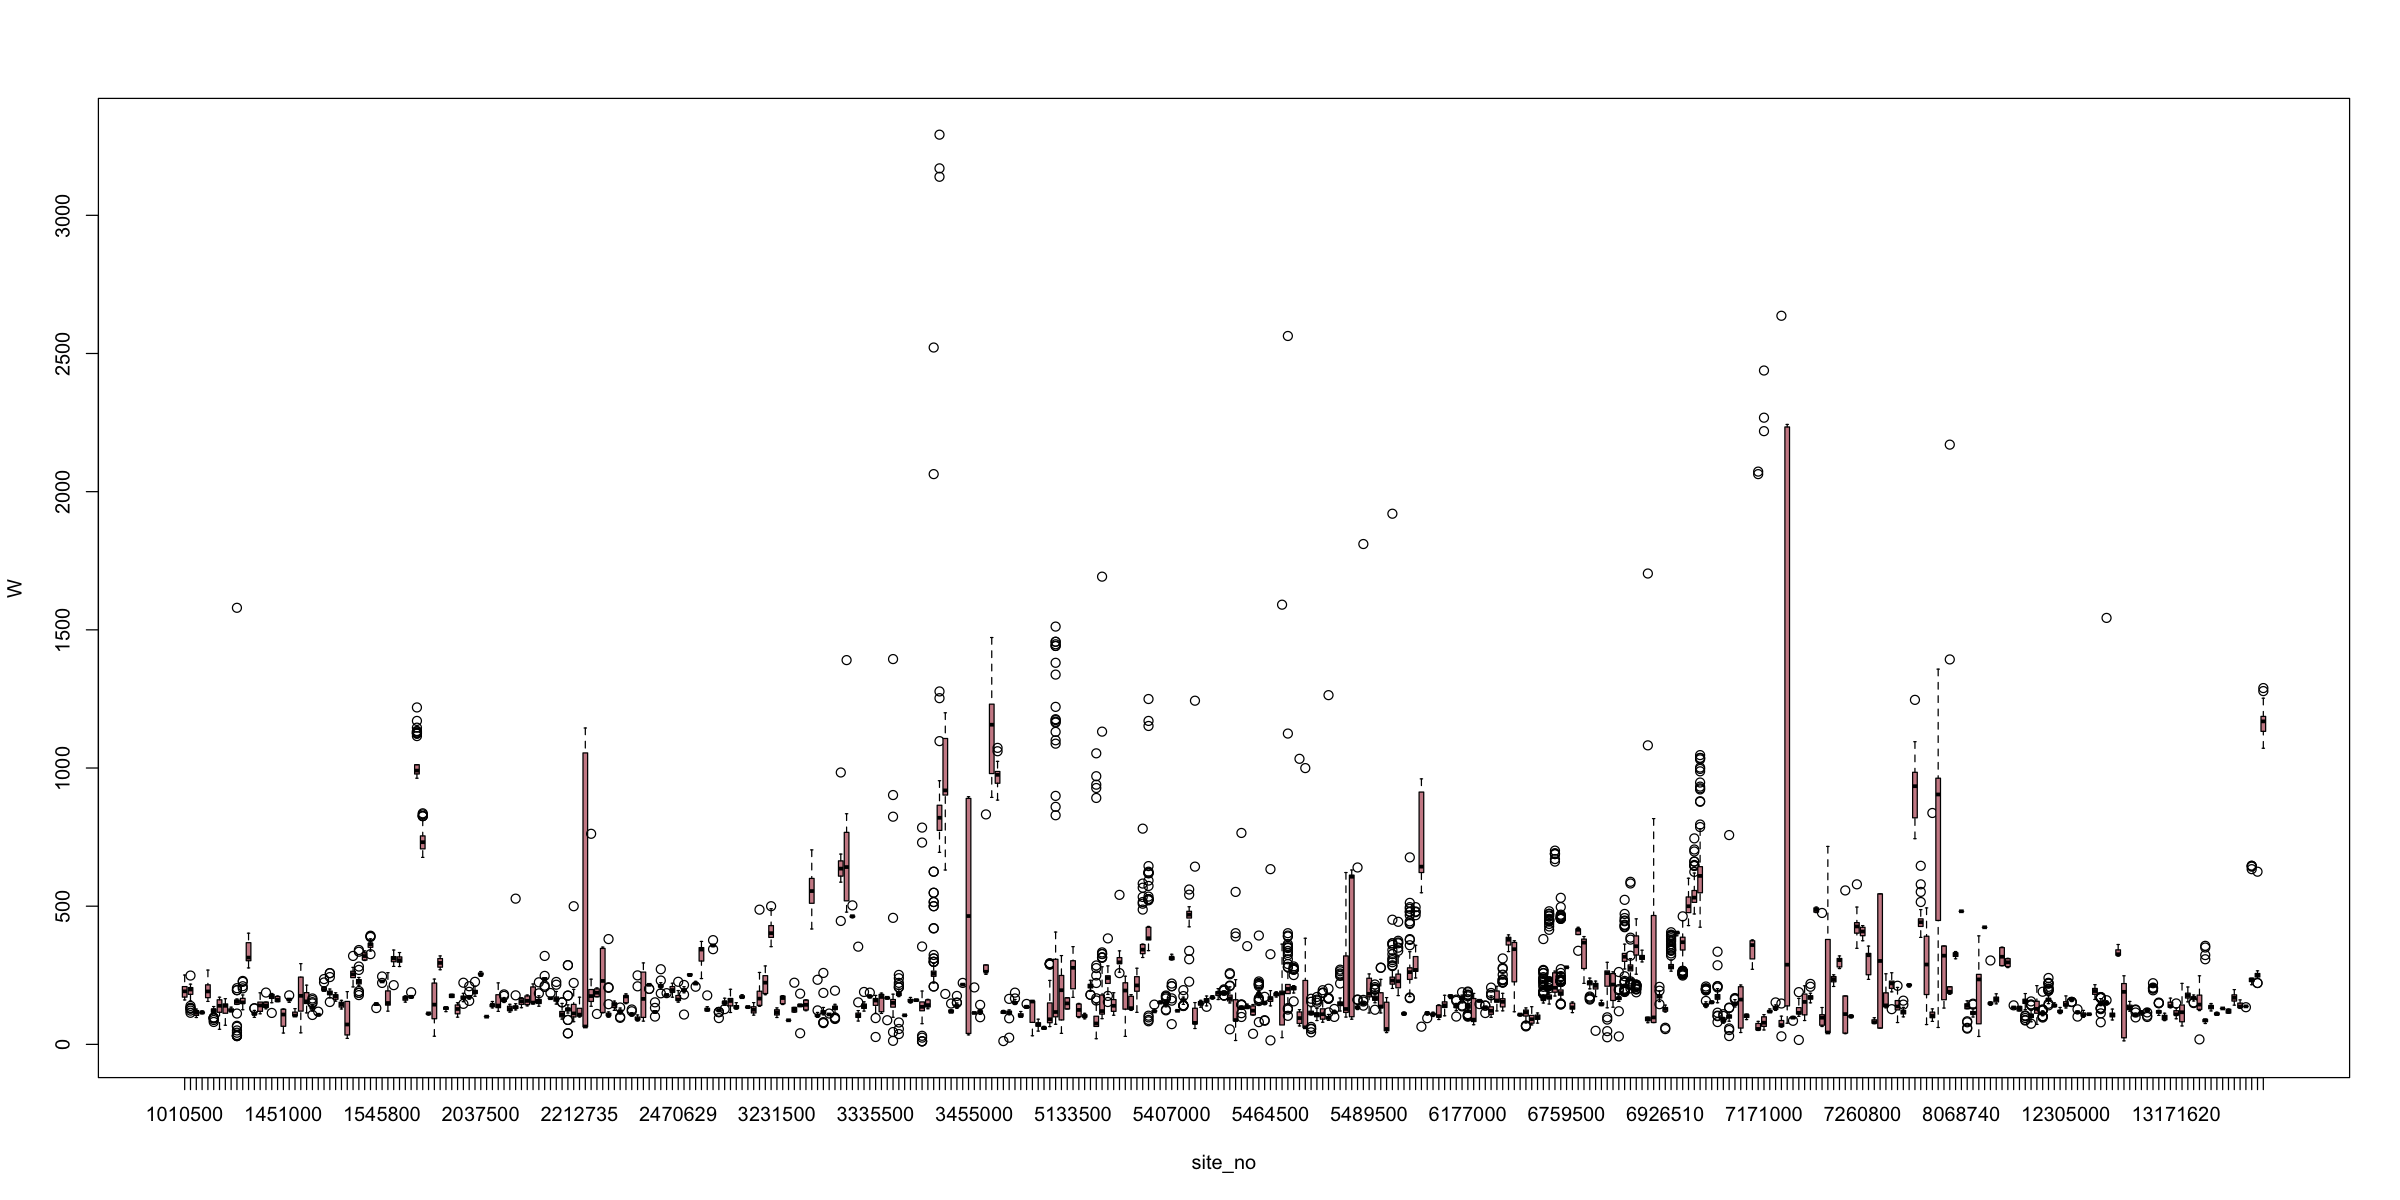

In [53]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverQ$W ~ riverQ$site_no, xlab="site_no", ylab="W", col="lightpink3")

In [54]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverQ$dH ~ riverQ$site_no, xlab="site_no", ylab="dH", col="mediumpurple2")

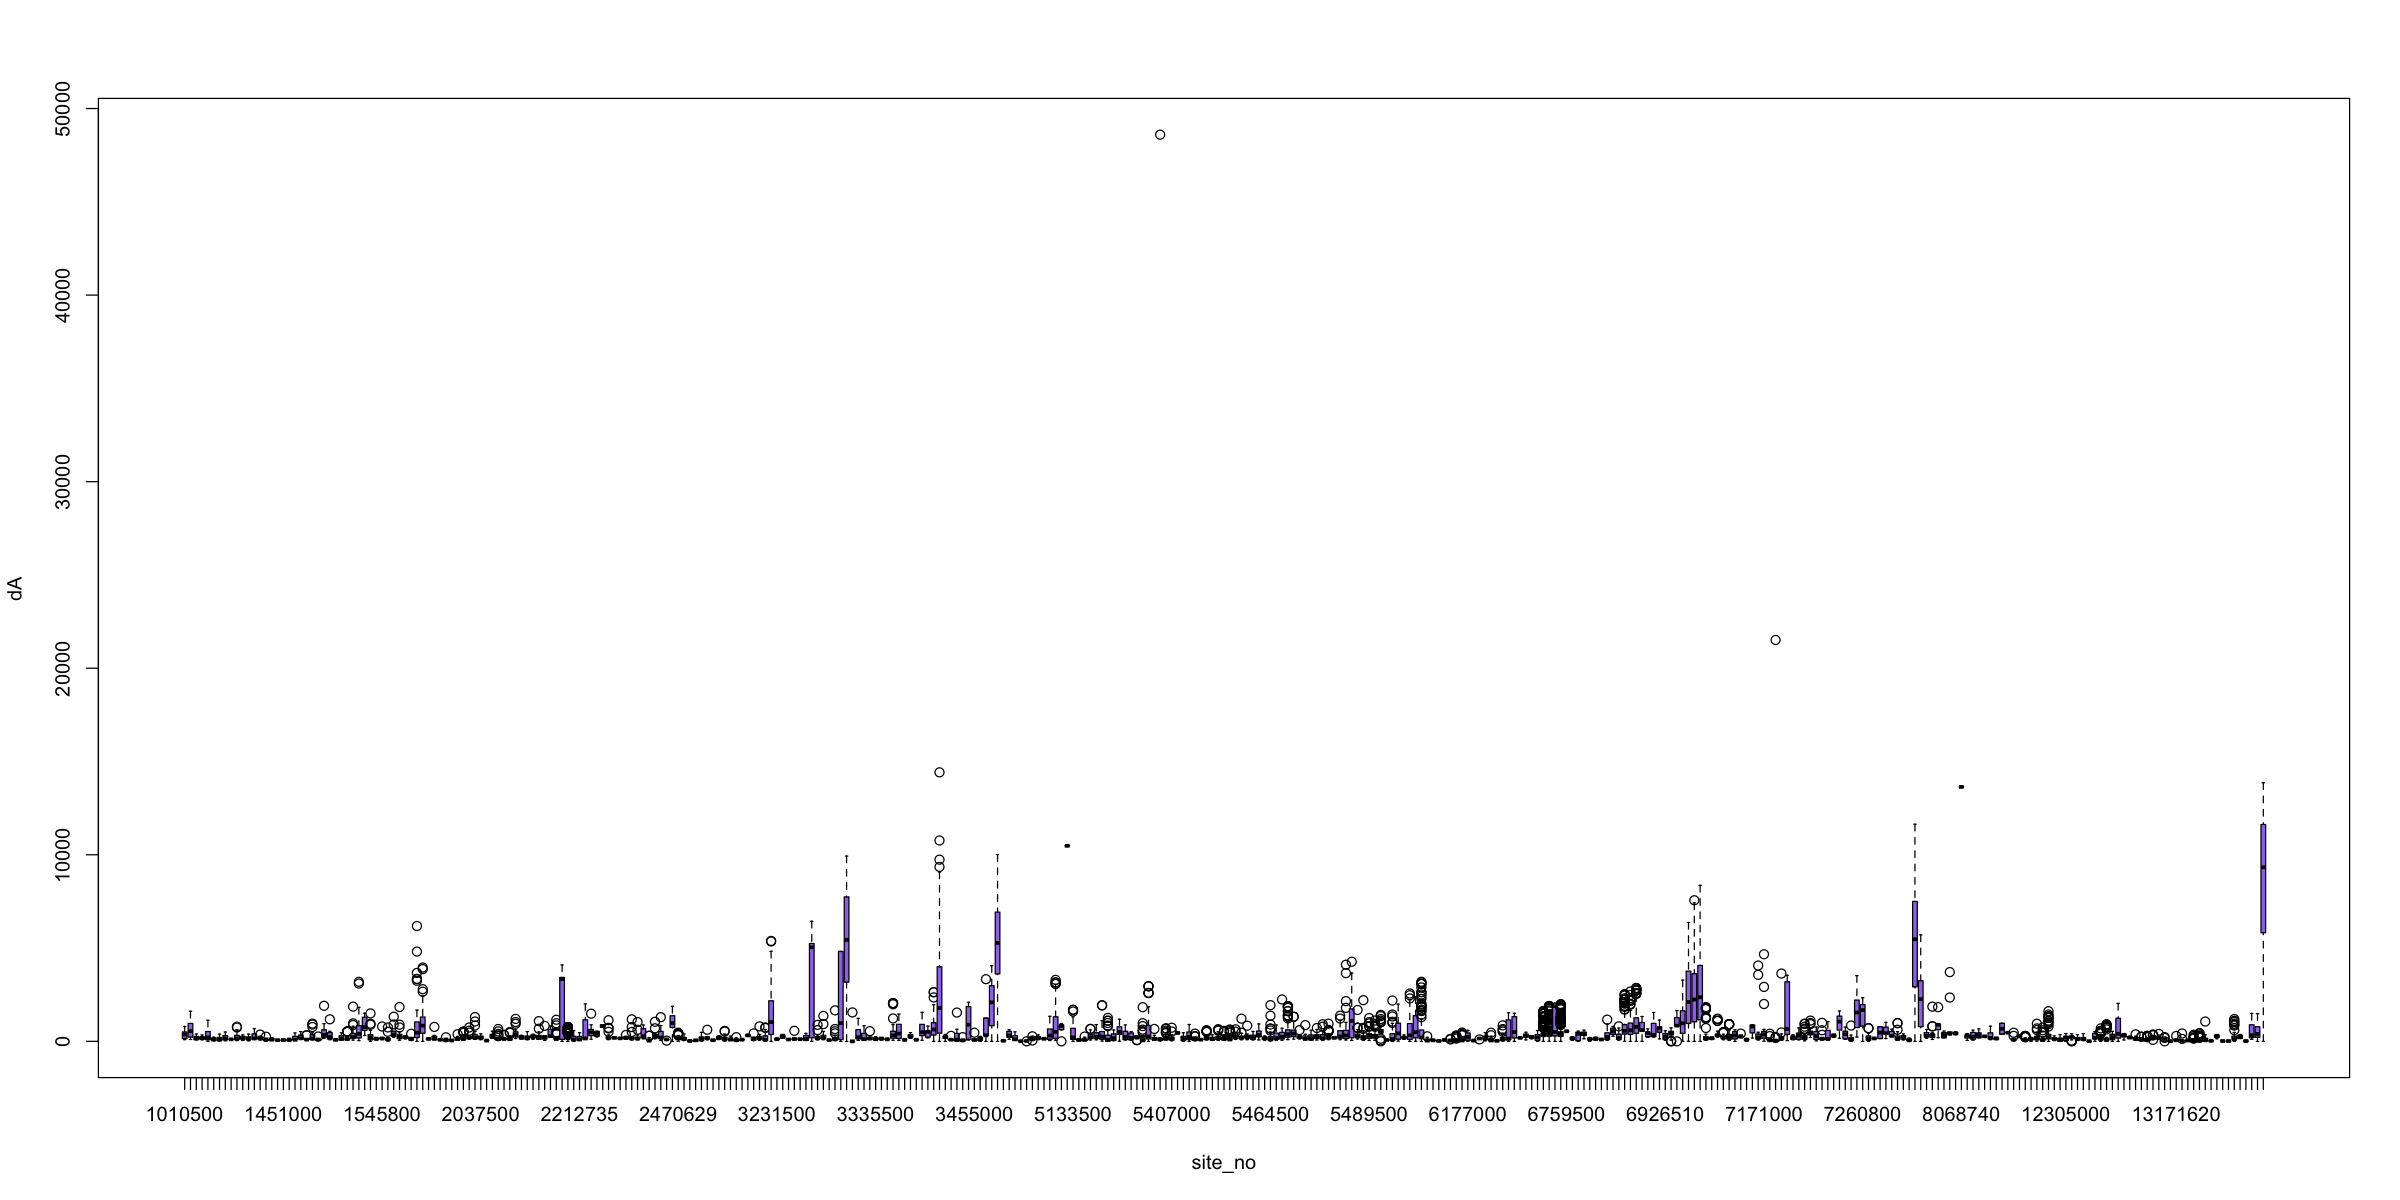

In [55]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverQ$dA ~ riverQ$site_no, xlab="site_no", ylab="dA", col="mediumpurple2")

In [56]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverQ$flowacc ~ riverQ$site_no, xlab="site_no", ylab="flowacc", col="green")

### V - Modification du jeu de données

In [57]:
riverM = riverQ[riverQ$dH<50,]

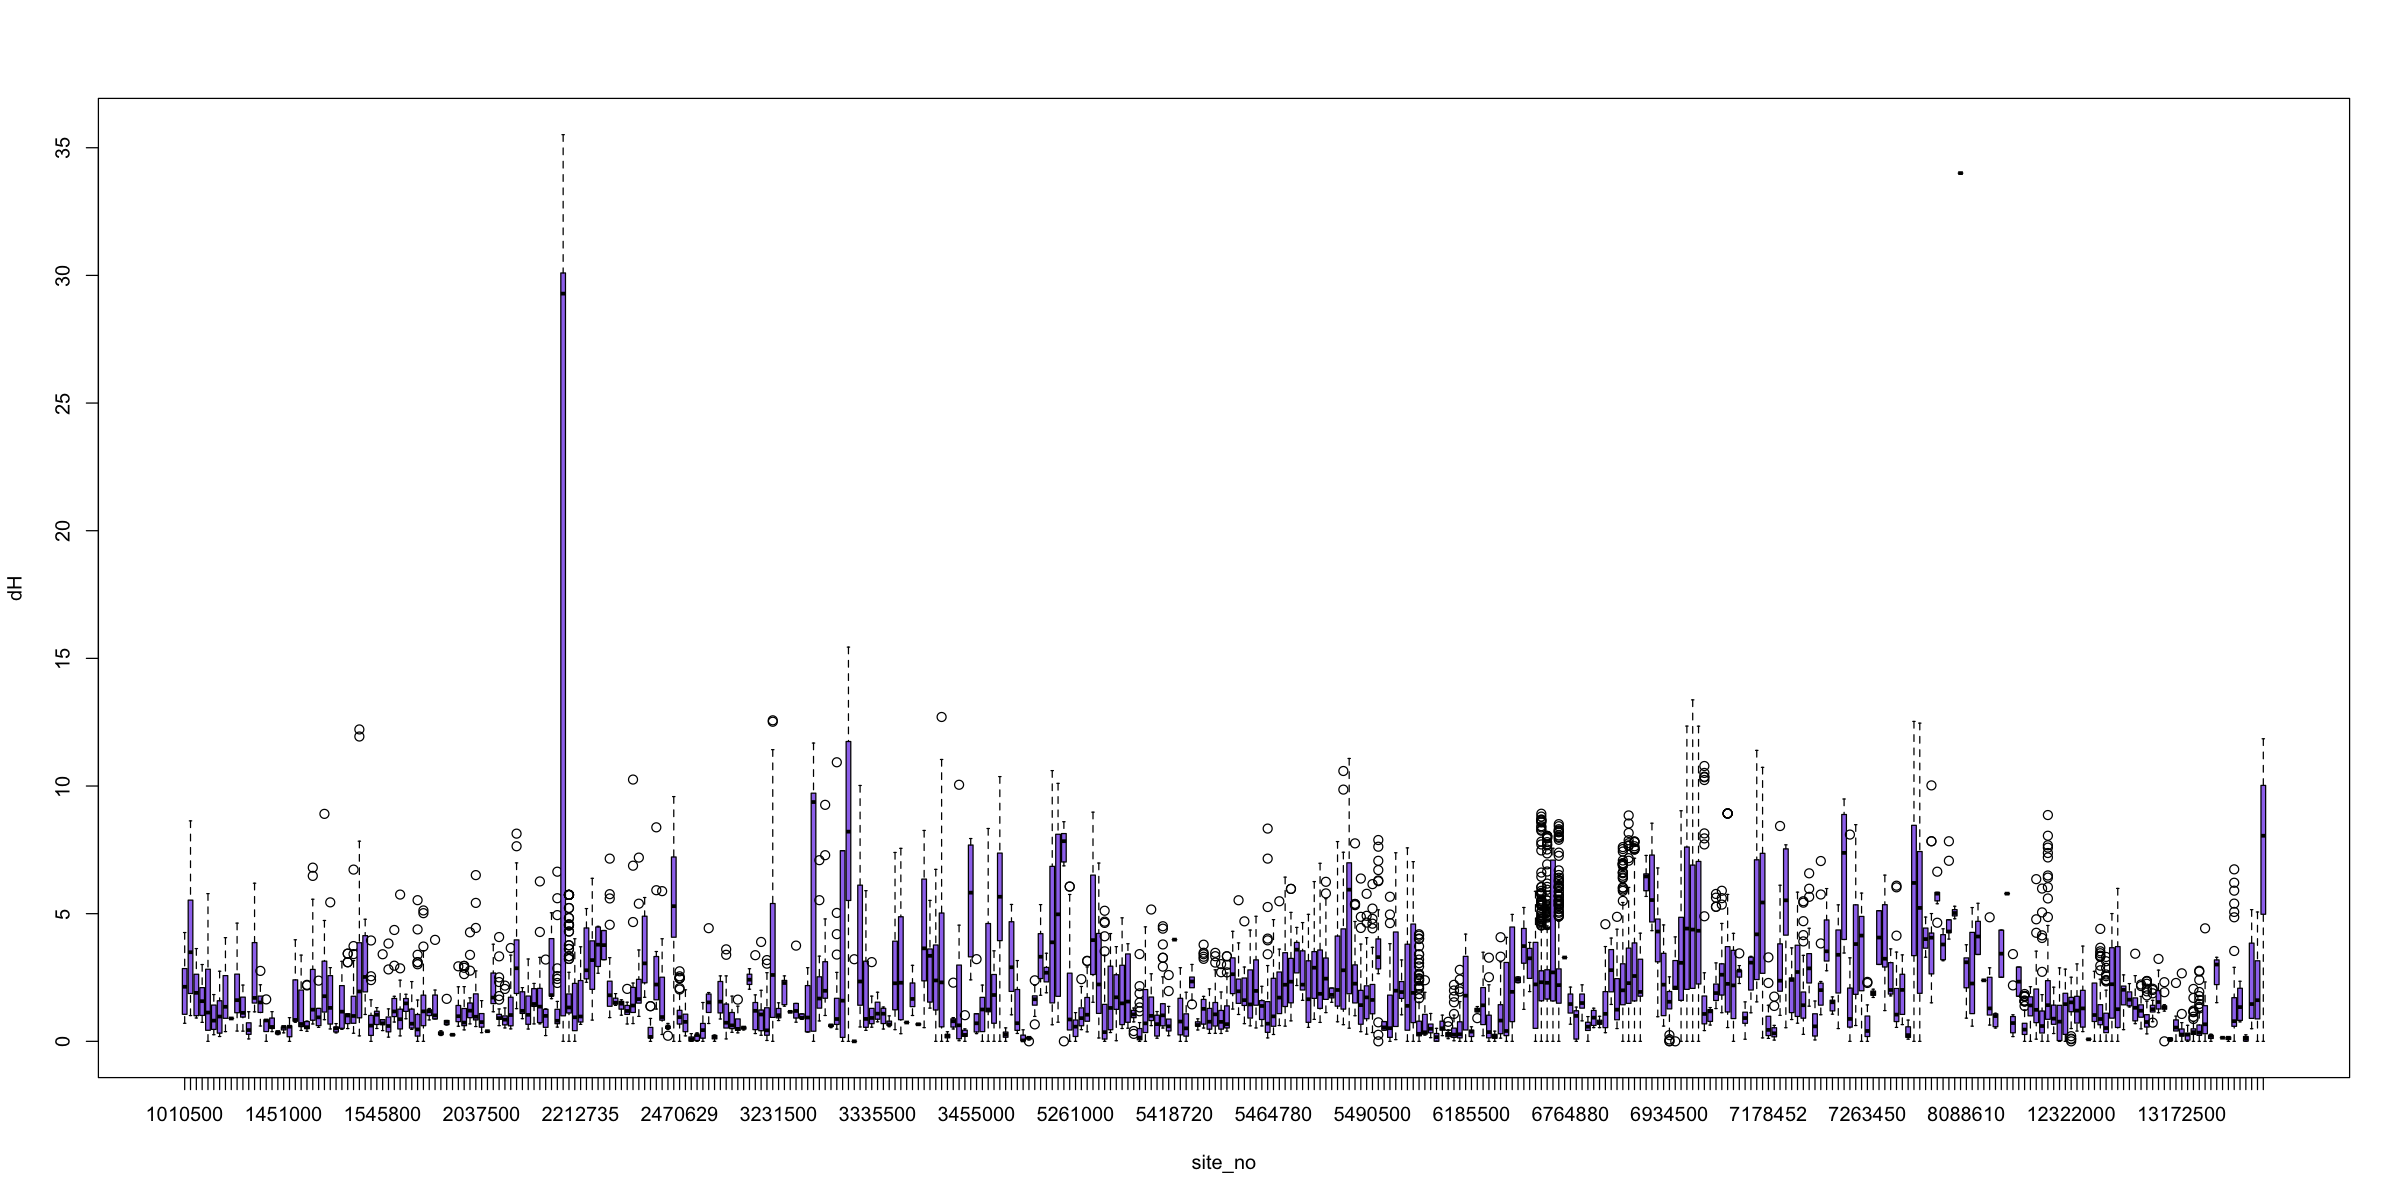

In [58]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverM$dH ~ riverM$site_no, xlab="site_no", ylab="dH", col="mediumpurple2")

In [59]:
riverM = riverM[riverM$dA<50000,]

In [60]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverM$dA ~ riverM$site_no, xlab="site_no", ylab="dA", col="mediumpurple2")

In [14]:
#head(riverM)

### VI - Quelques statistiques descriptives supplémentaires

In [61]:
hist(riverM[,"Q"], xlab="Q", ylab="frequency", col="lightsteelblue2")

In [62]:
#hist1 = hist(riverHNLQ[,"Q"], plot=FALSE)
#hist2 = hist(riverLNHQ[,"Q"], plot=FALSE)
#plot(hist1, col="lightsteelblue2")
#plot(hist2, col="red", add=TRUE)

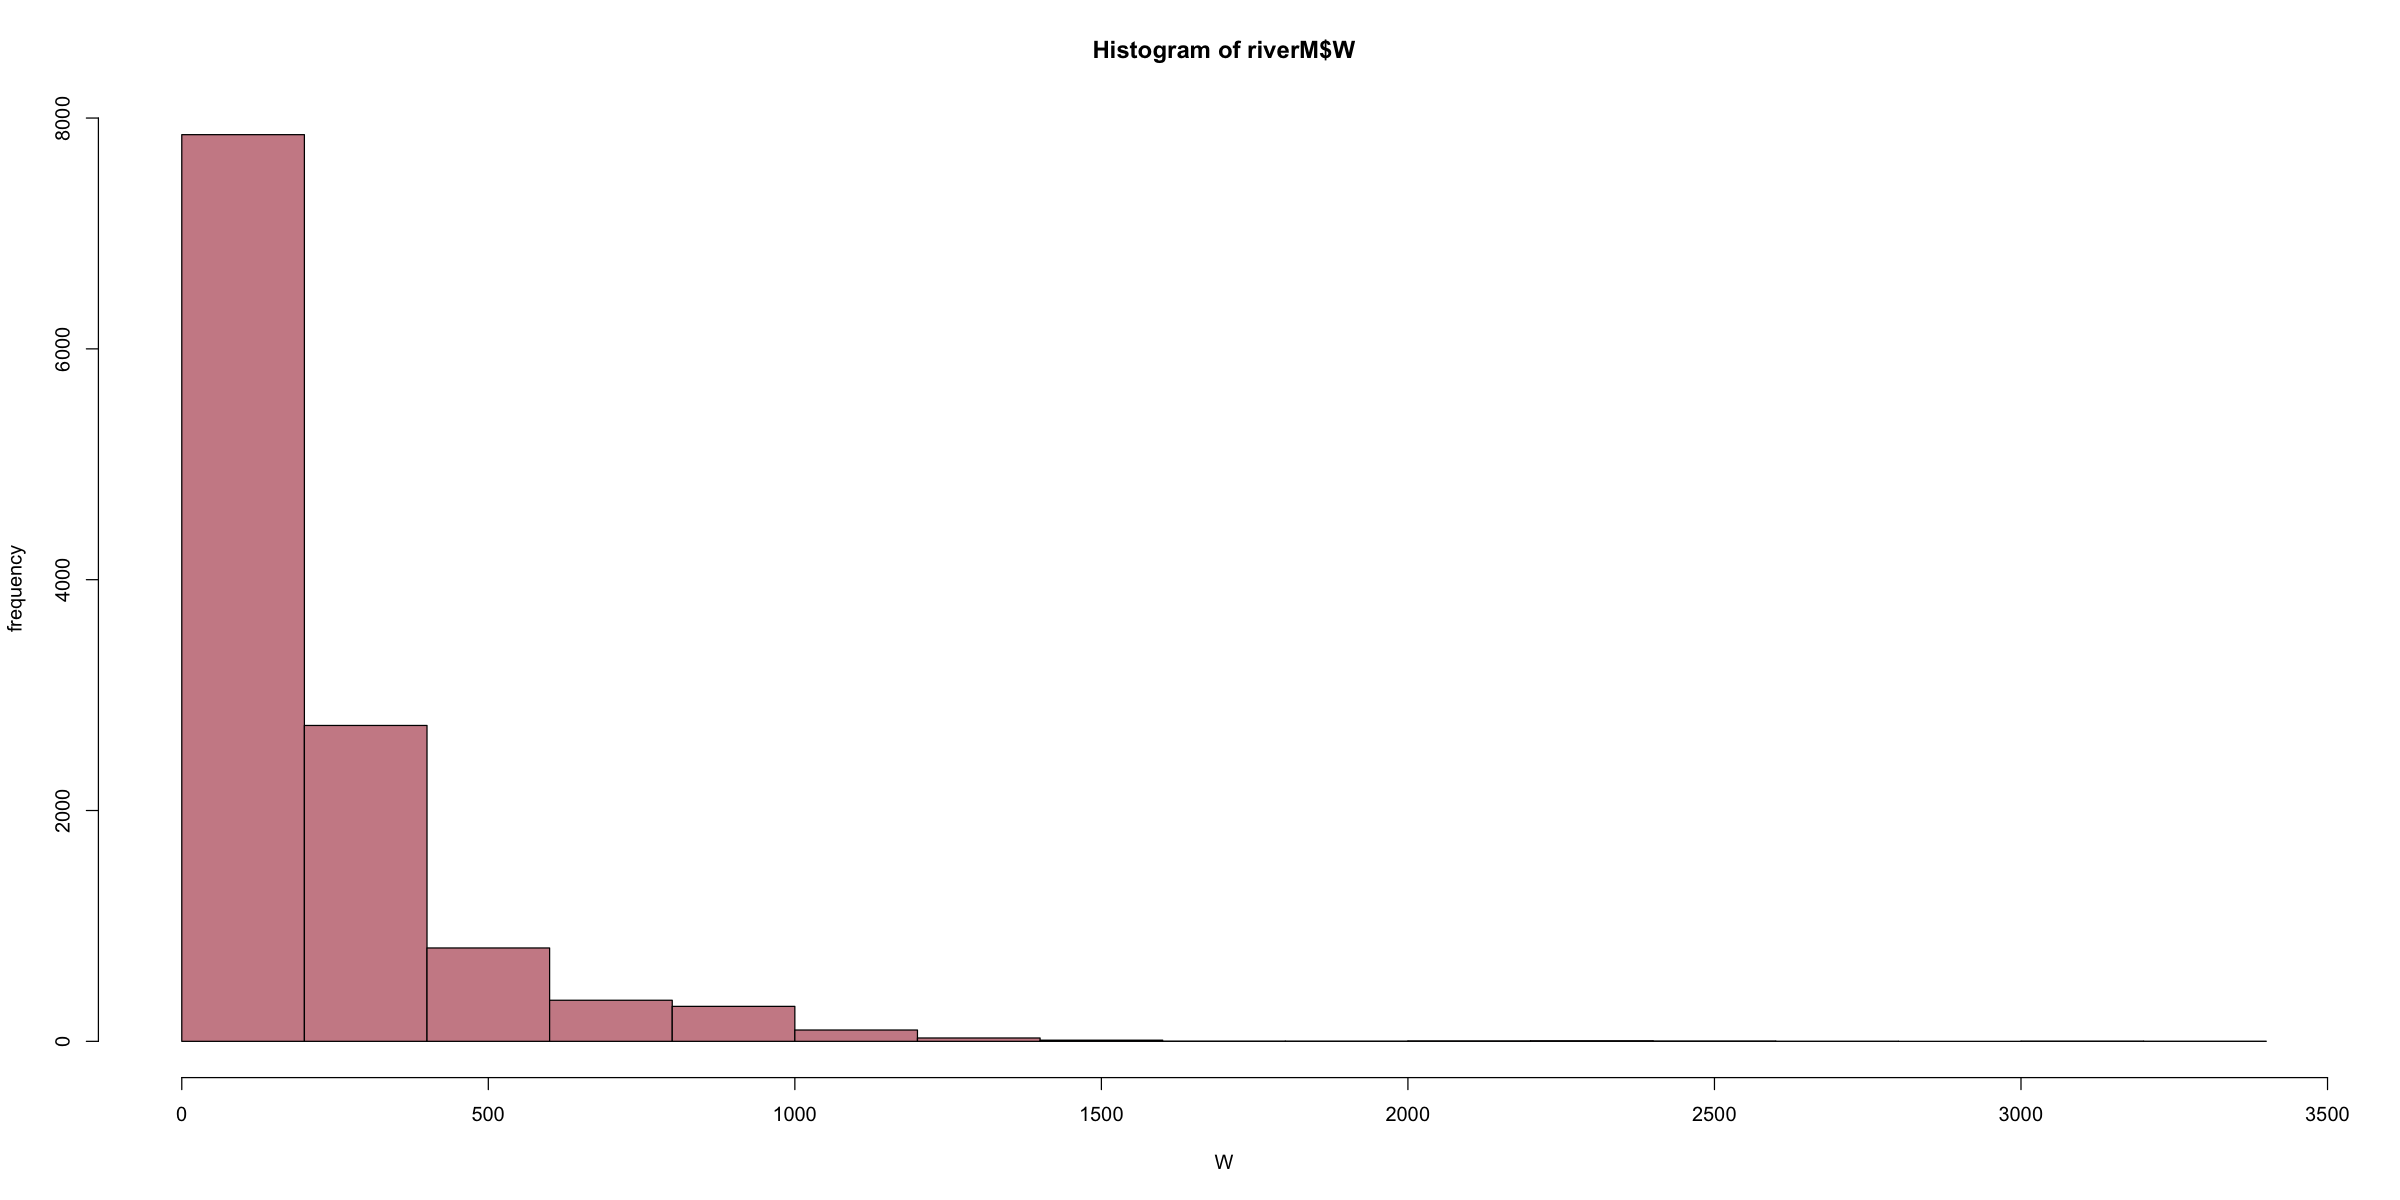

In [63]:
hist(riverM$W, xlab="W", ylab="frequency", col="lightpink3")

In [64]:
#hist3 = hist(riverHNLQ[,"W"], plot=FALSE)
#hist4 = hist(riverLNHQ[,"W"], plot=FALSE)
#plot(hist3, col="green")
#plot(hist4, col="yellow", add=TRUE)

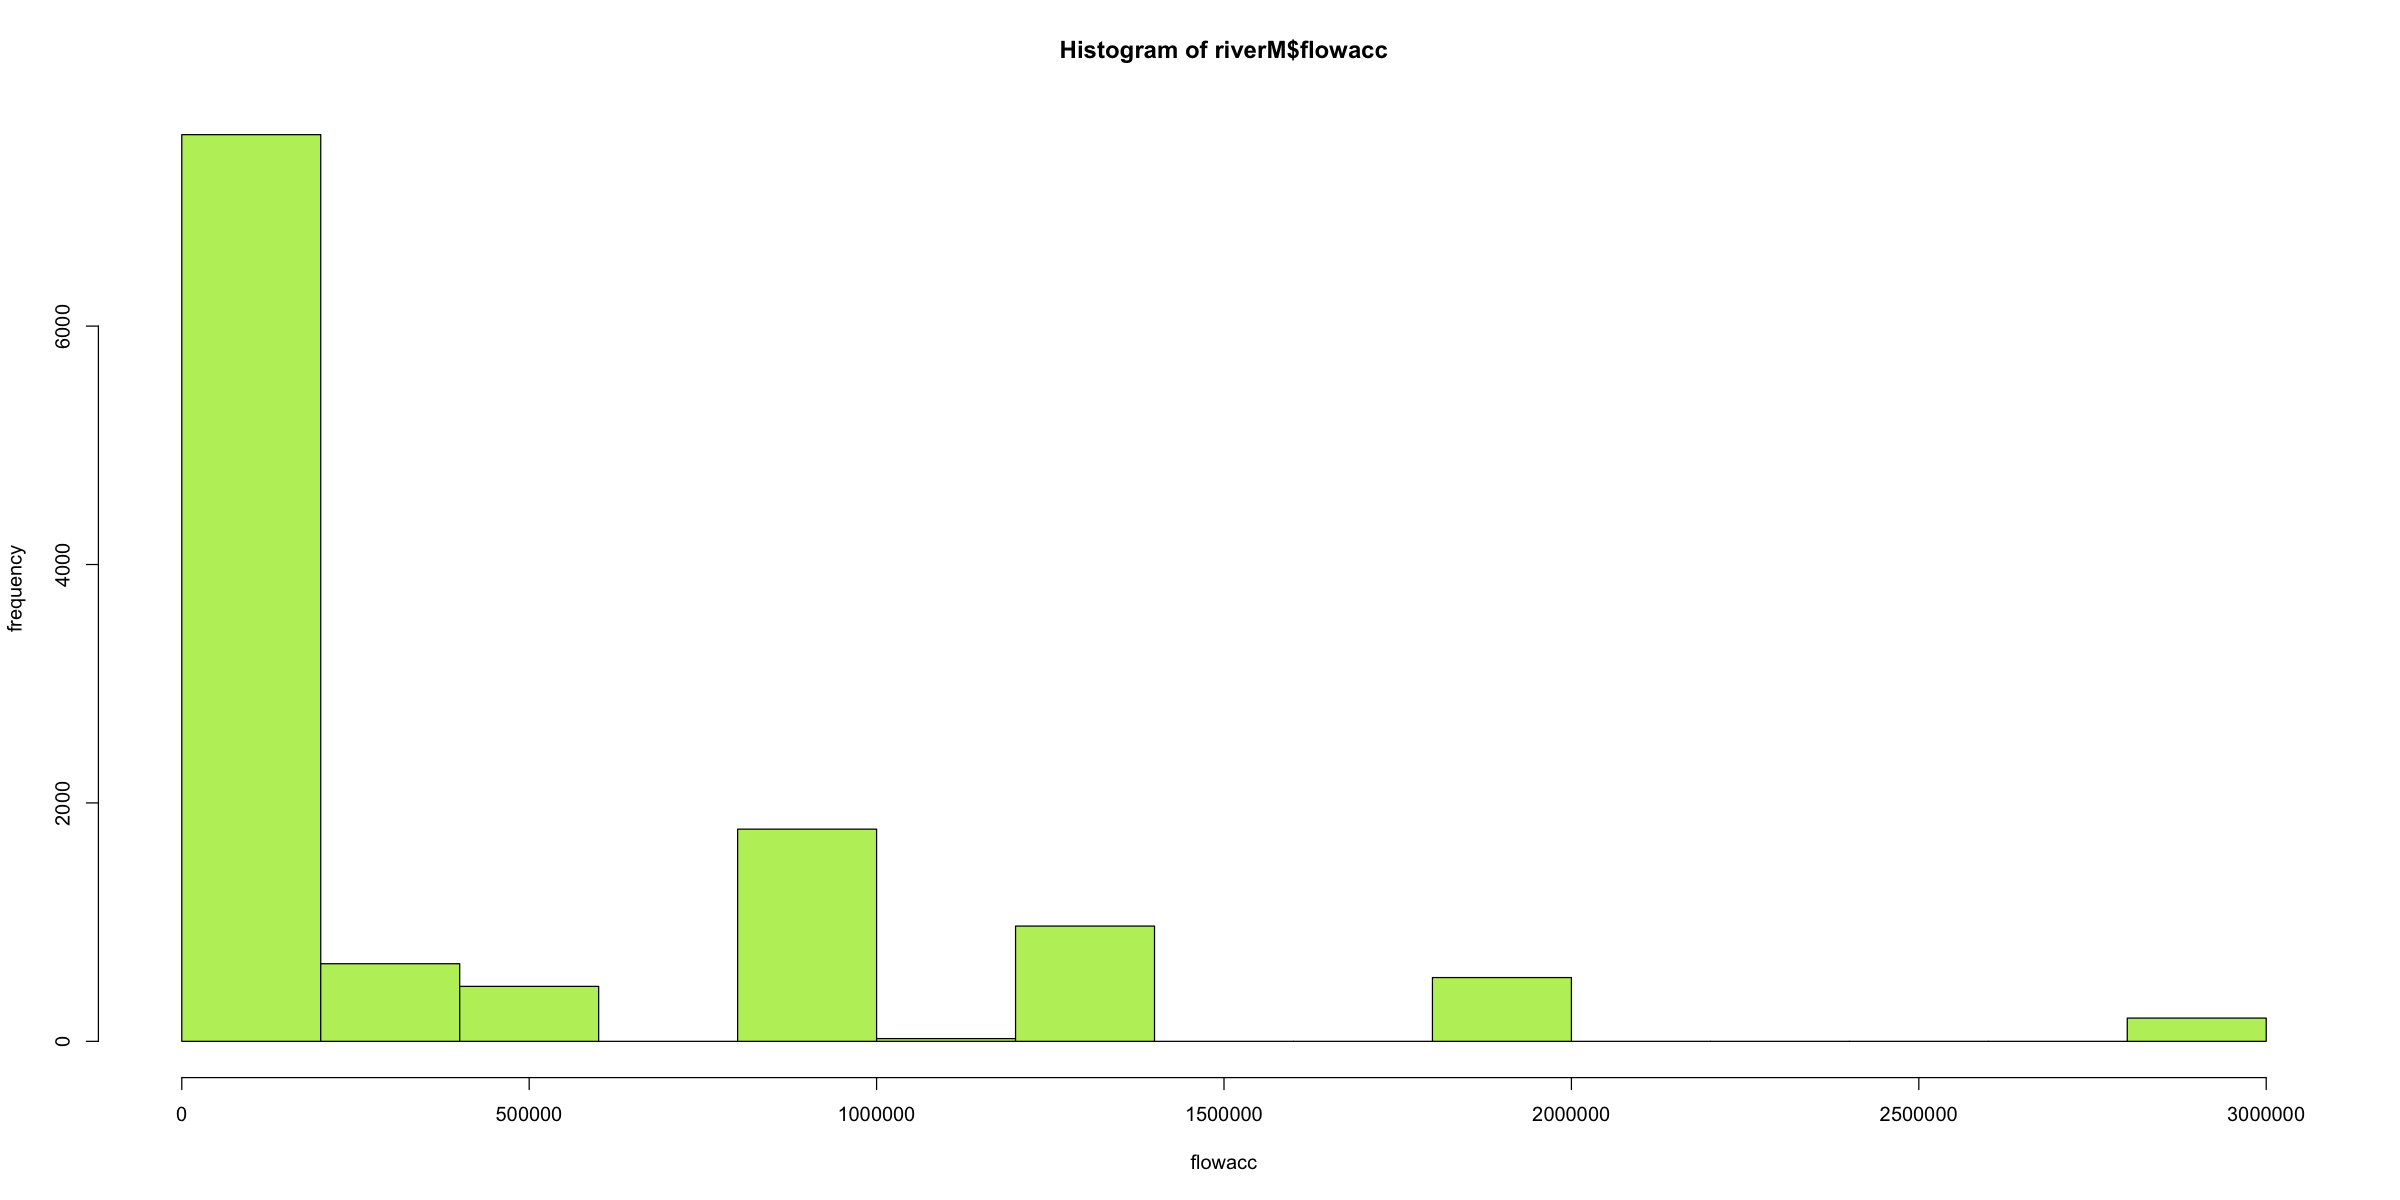

In [65]:
hist(riverM$flowacc, xlab="flowacc", ylab="frequency", col="darkolivegreen2")

In [66]:
hist(riverM$dH, xlab="dH", ylab="frequency", col="mediumpurple2")

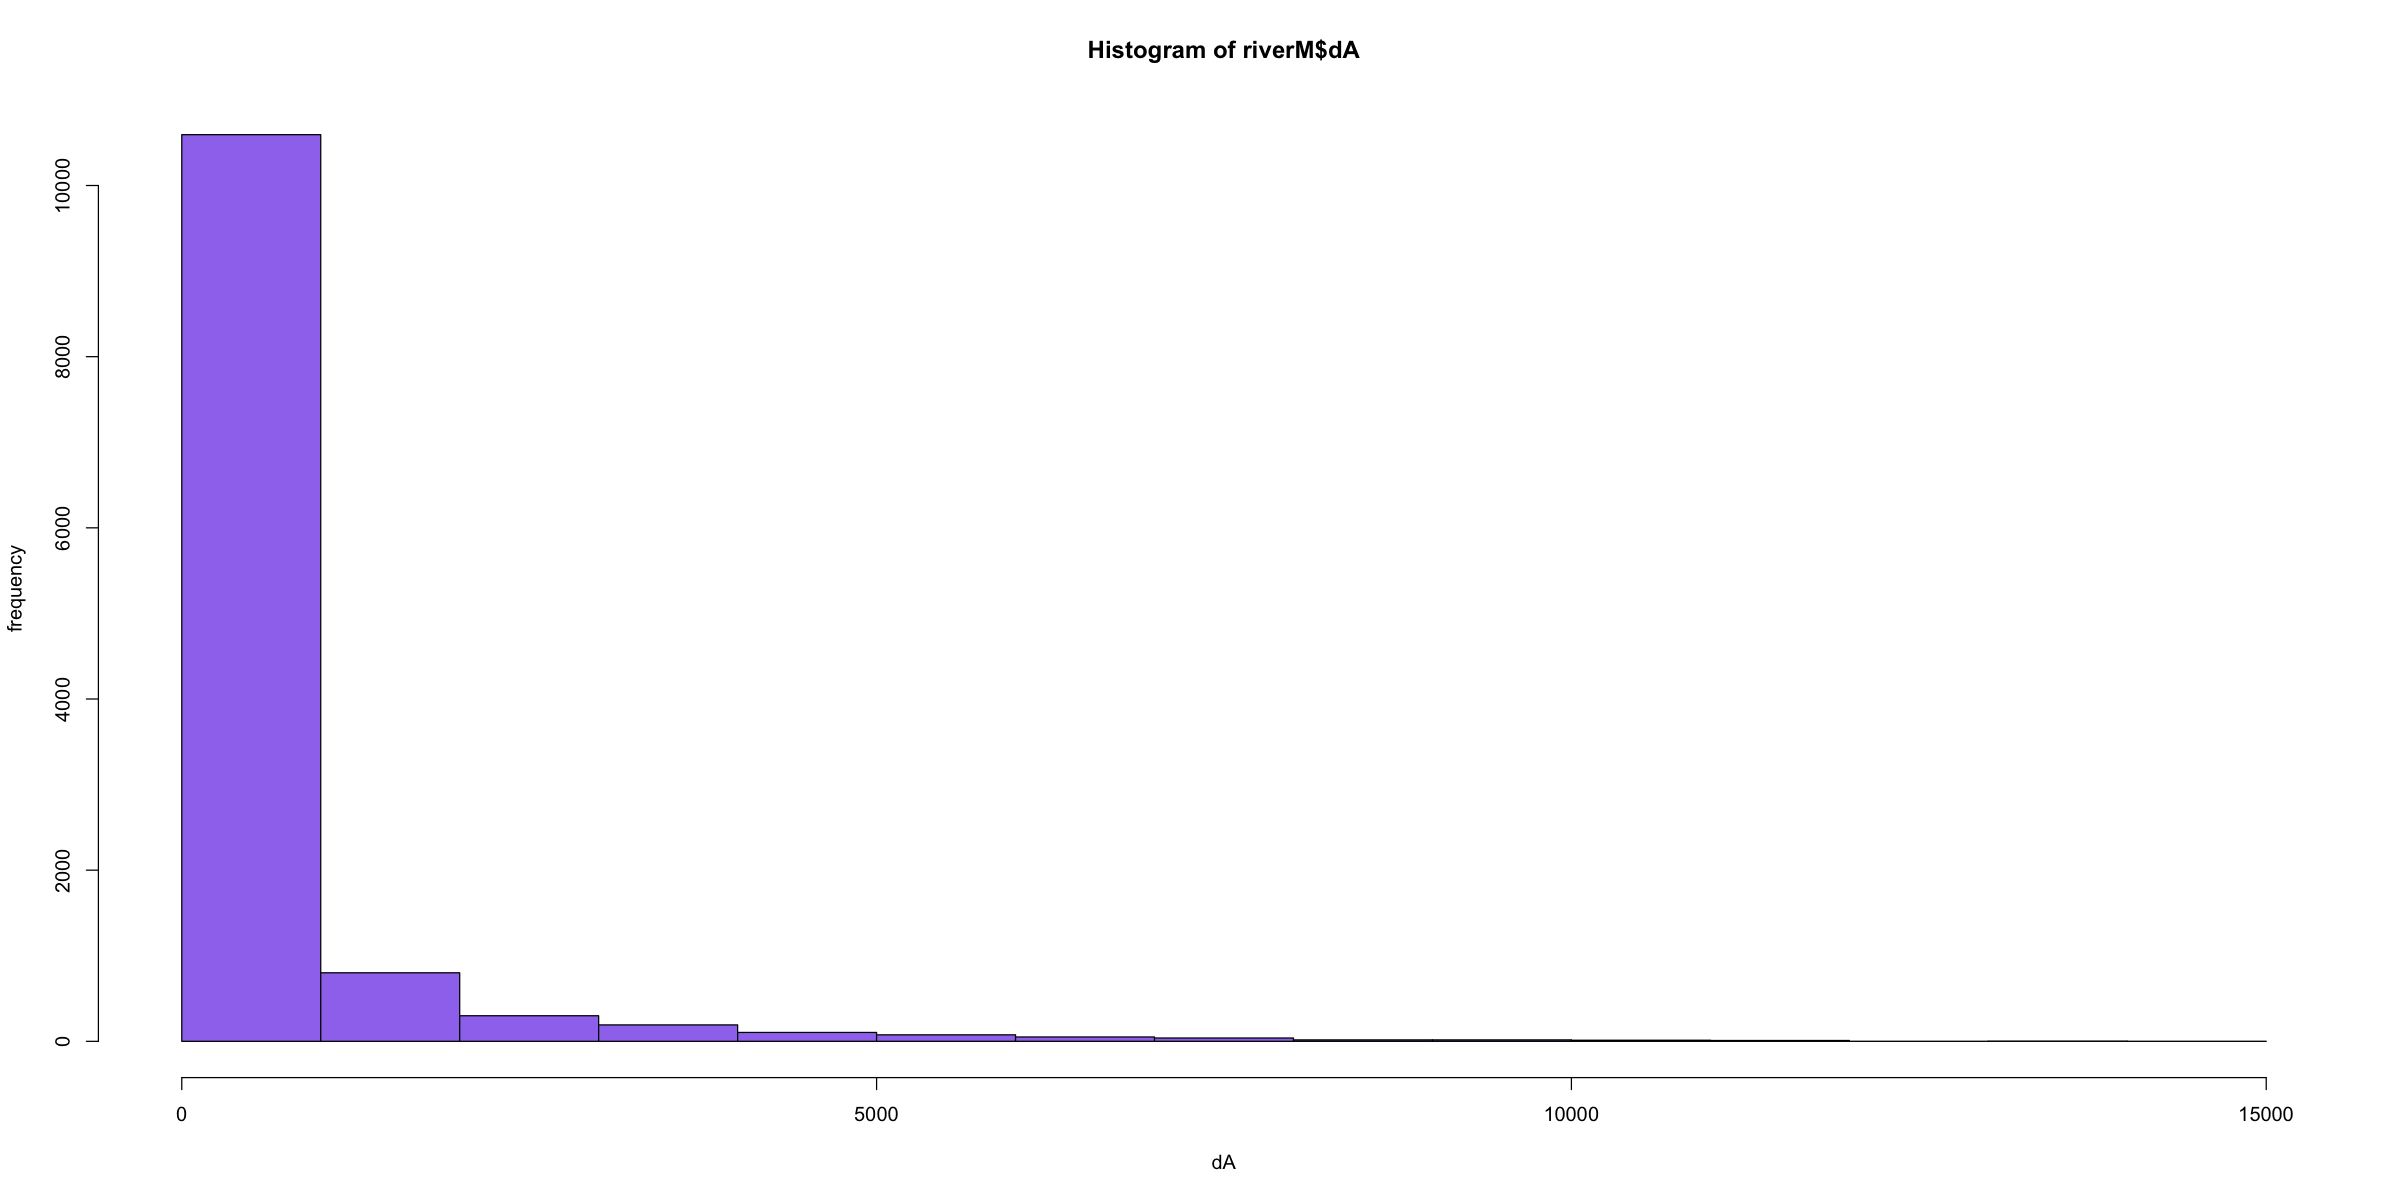

In [67]:
hist(riverM$dA, xlab="dA", ylab="frequency", col="mediumpurple2")

### VII - Matrice de corrélations

In [82]:
#Modification du jeu de données
todrop = c('A0','Abar','Amed','site_no','station_name','river','stream_type','U','Q5_GSCD','Q10_GSCD','Q20_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD','QMEAN_GSCD')
riverCORR = riverM[,!(names(riverM) %in% todrop)]
#head(riverCORR)

In [83]:
corrplot(cor(riverCORR), method="ellipse")

**Variables les plus fortement corrélées avec le débit (Q)**
- dA
- W
- flowacc
- dH
- sand

Remarques : Les trois premières ont une corrélation assez forte, c'est déjà beaucoup plus faible pour les suivantes. Concernabt sand, c'est une corrélation négative.

### VIII - Analyse en Composantes Principales (ACP)

**Objectif** : Réduire la dimension du problème de grande taille.  
**Reformulation** : Regrouper les différentes variables du problème au sein de méta-variables qui vont permettre d'analyser les données plus facilement.
**Méthode** : Projeter les p variables évoluant dans un espace vectoriel de dimennsion p (ici, p=24) dans un sous-espace vectoriel de dimension beaucoup plus petite. On remplcae ensuite le nuage de points initial par sa projection orthogonale sur le sous-espace ainsi défini.

In [84]:
#Modification du jeu de données
todrop2 = c('A0','Abar','Amed','station_name','site_no','stream_type','Q','U','Q5_GSCD','Q10_GSCD','Q20_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD','QMEAN_GSCD')
riverACP = riverM[,!(names(riverM) %in% todrop2)]
#dim(riverACP)
#test=integer(16804)
#test[0:40]=1
#test
#head(riverACP)
#riverACP=cbind(test, riverACP)
riverACP[, "river"] <- as.factor(riverACP[, "river"])
#head(riverACP, 50)

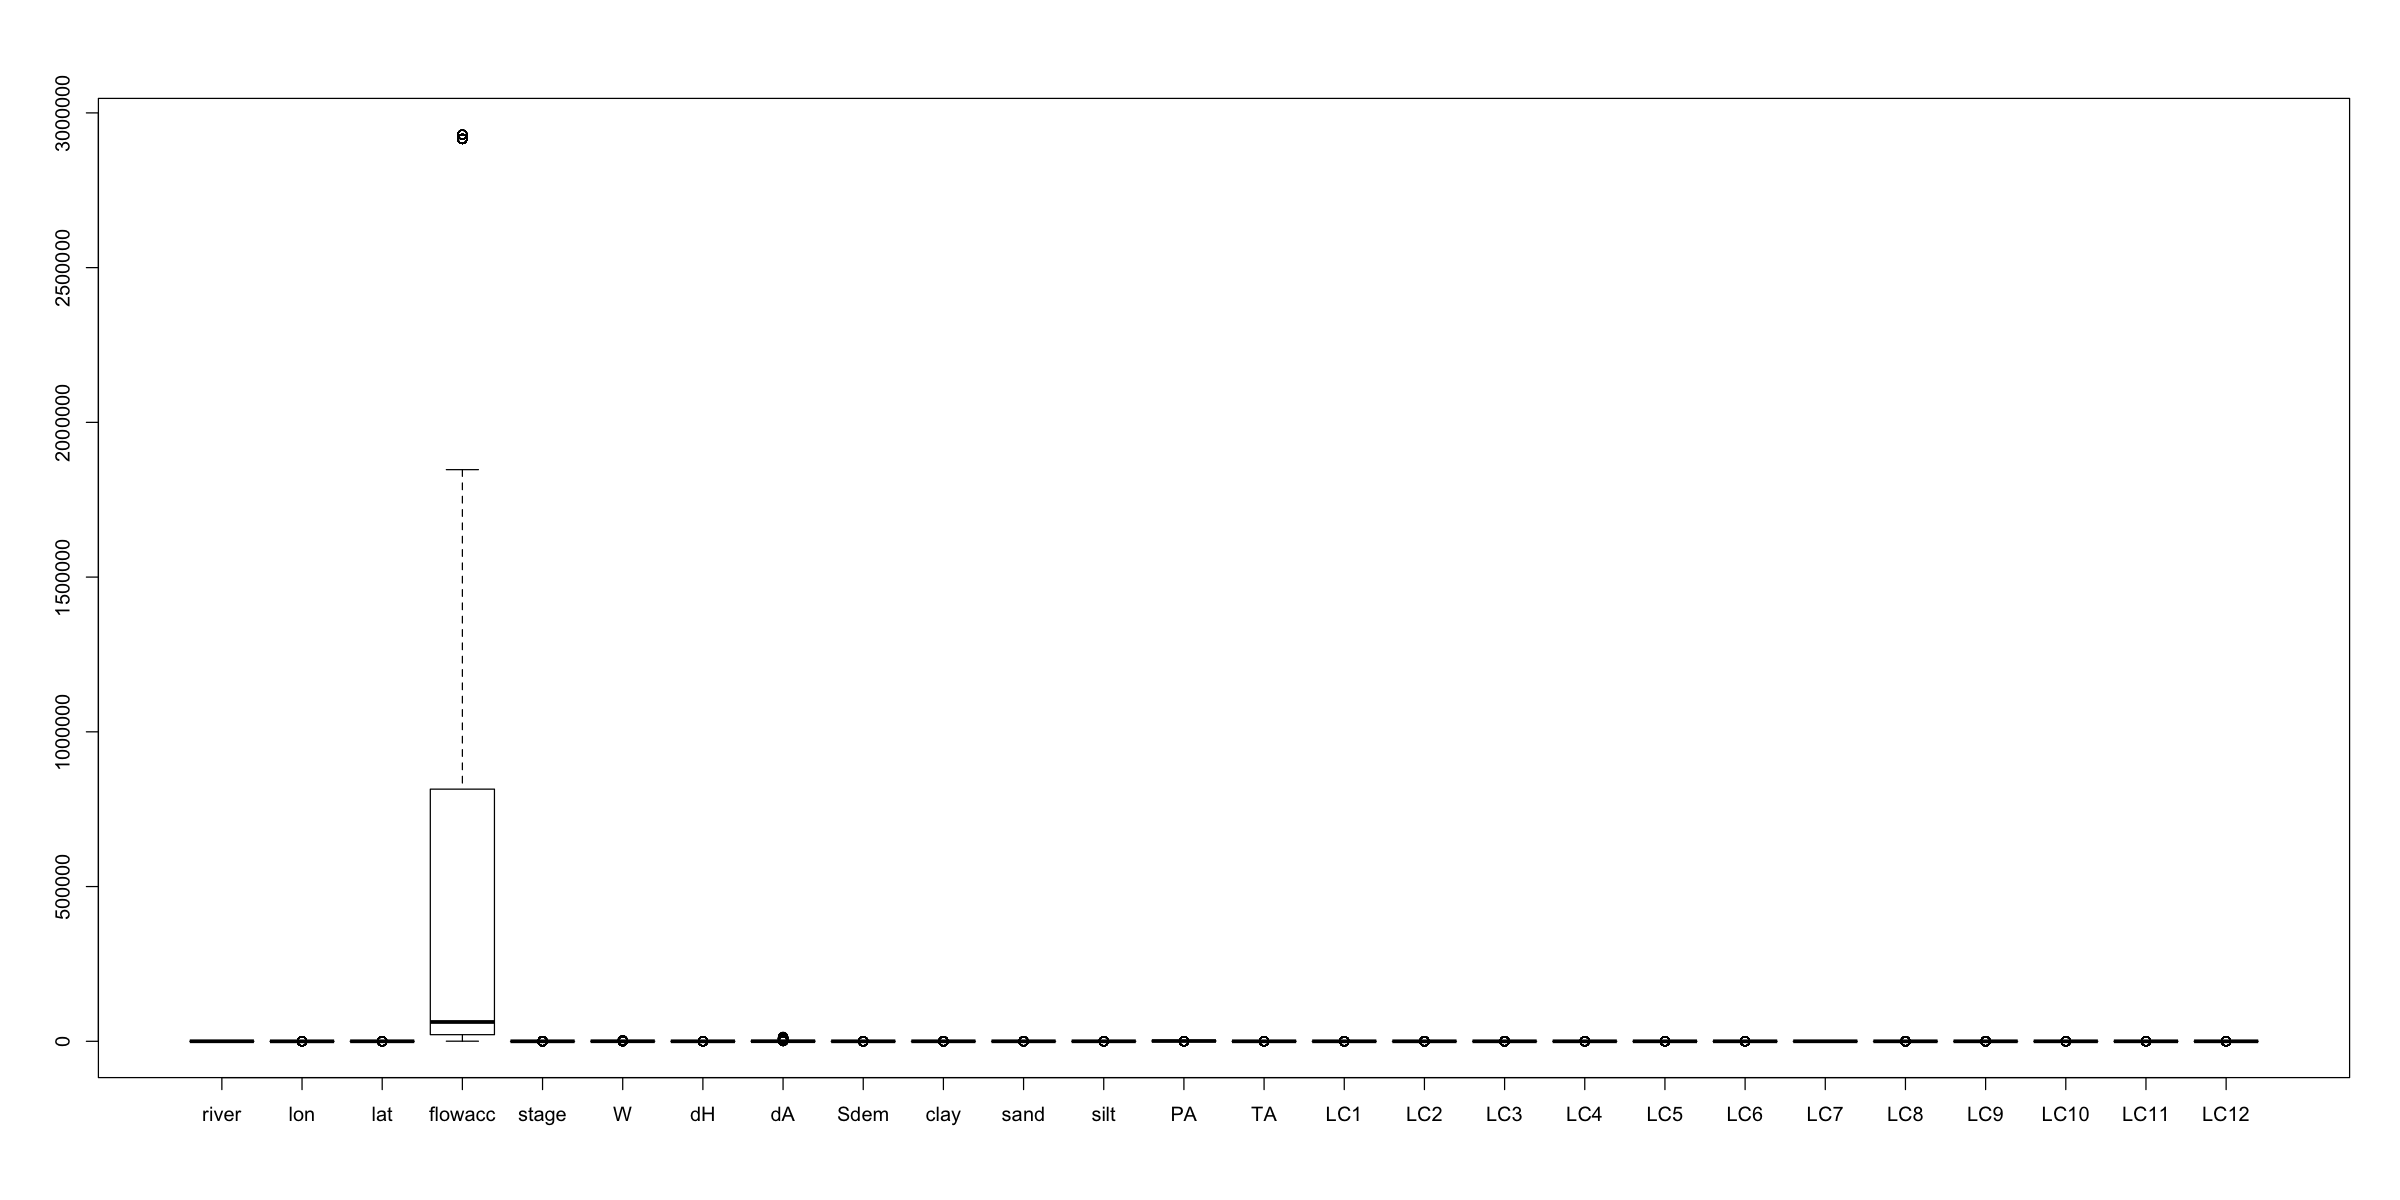

In [85]:
boxplot(riverACP)

Nécessité de normaliser les données car la variable *flowacc* prend des valeurs beaucoup plus grandes que celles des autres variables.

In [86]:
ACP = PCA(riverACP, scale=TRUE, graph=FALSE, ncp=24, quali.sup=1)
barplot(ACP$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")

In [87]:
boxplot(ACP$ind$coord, main = "Coordinates of individuals")

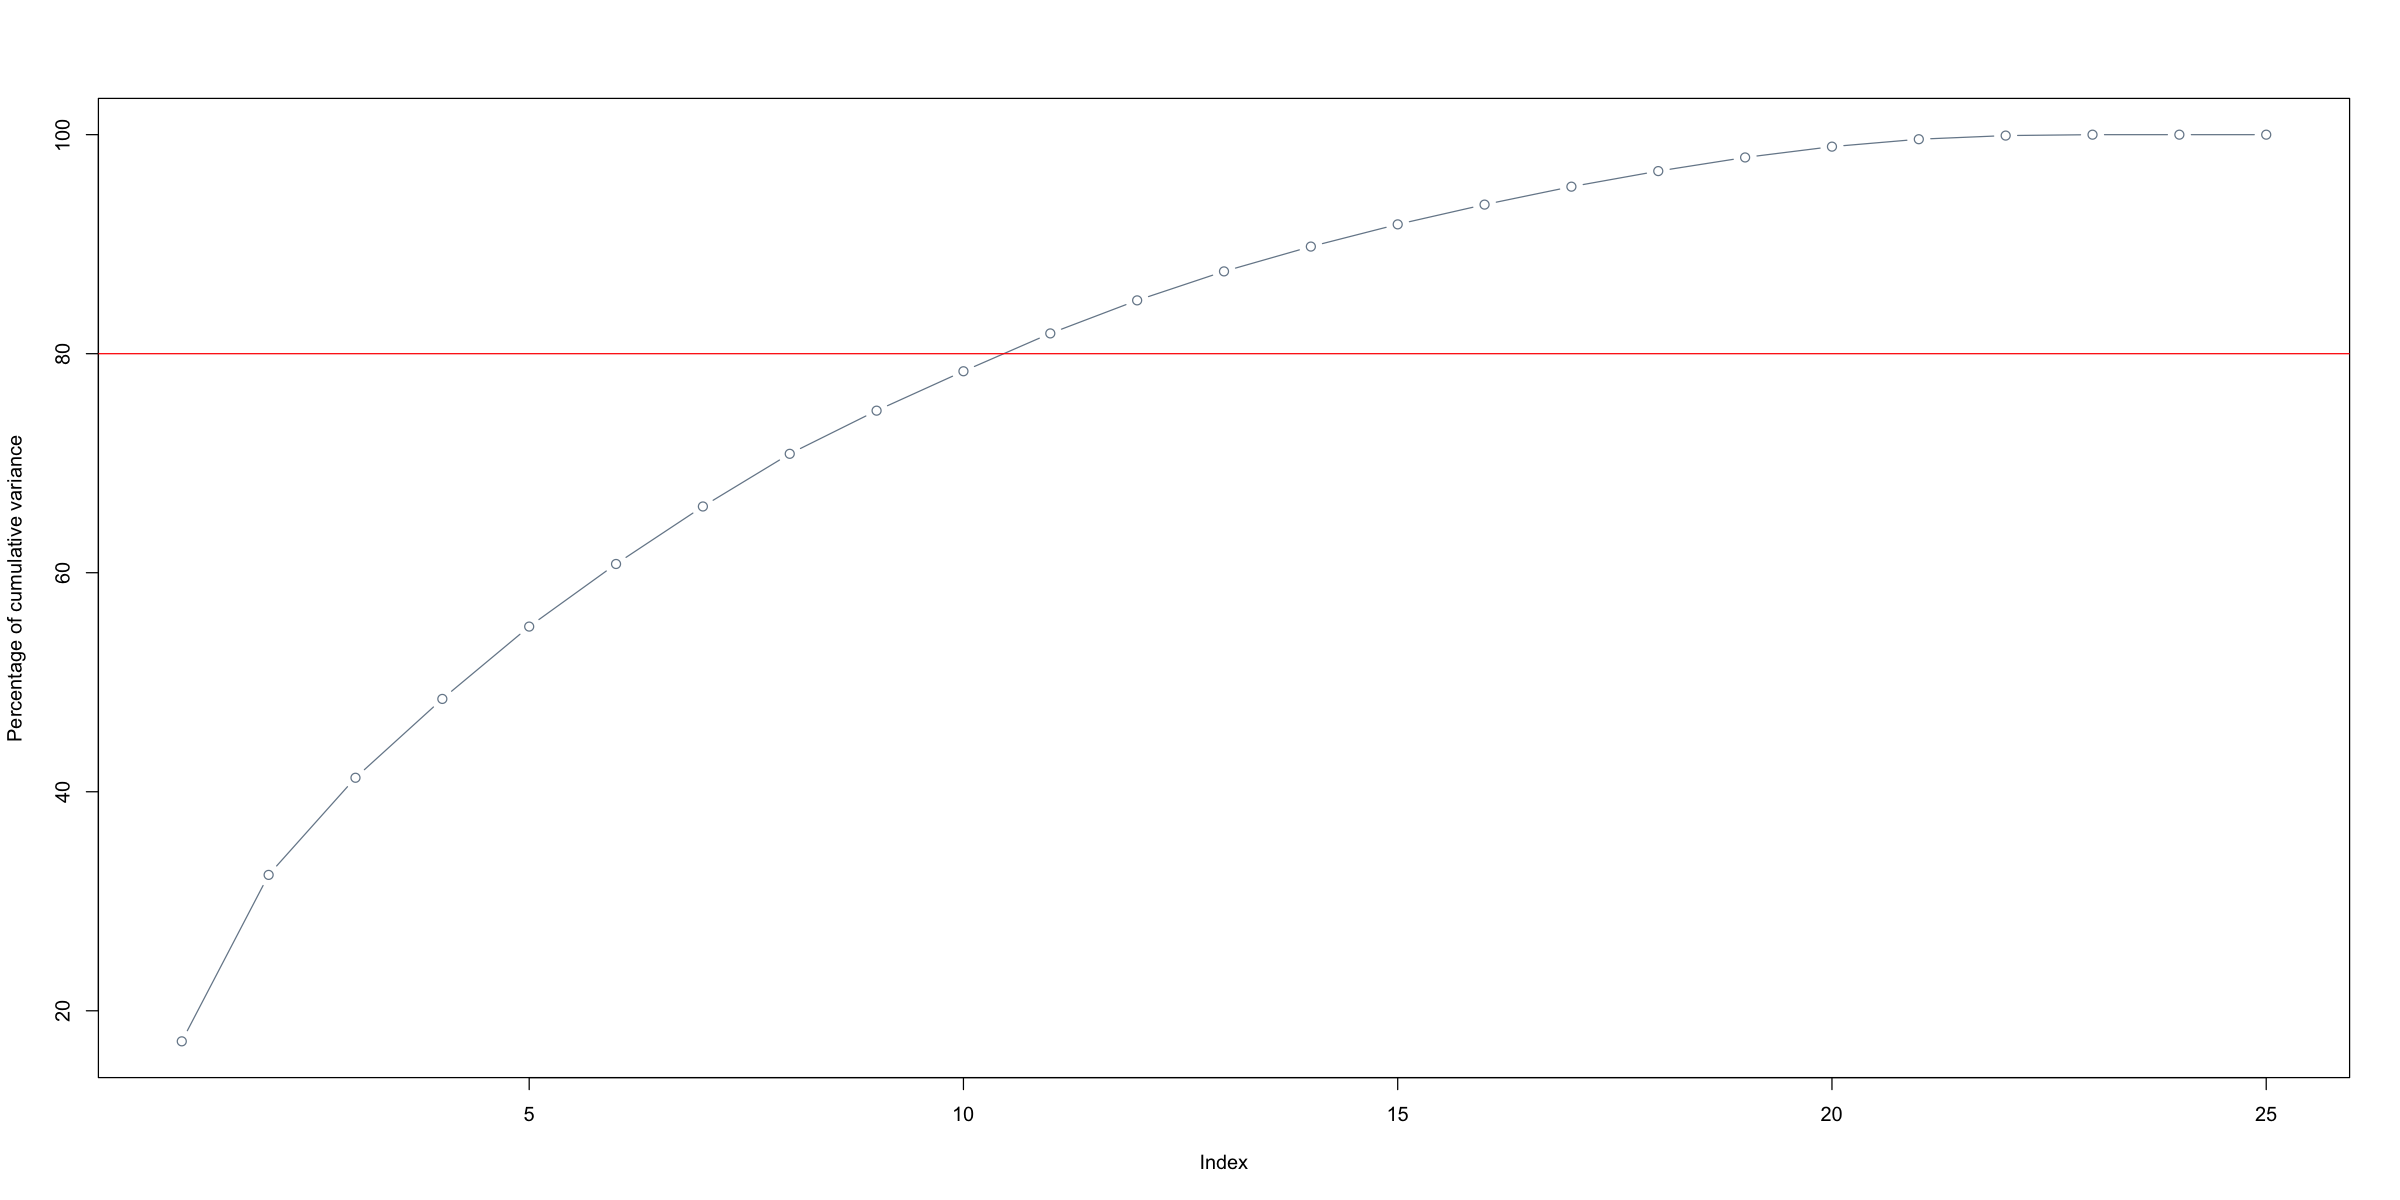

In [88]:
plot(cumsum(ACP$eig[, 2]), type='b', col='lightslategrey', ylab="Percentage of cumulative variance")
abline(h=80, col='red')

#### Choix du nombre de composantes

**Étape 1** : Trouver un vecteur *v1* tel que Var(Xv1) est maximale (cela revient à former une combinaison linéaire des colonnes de X). X est la matrice du problème, et *v1* est la direction de ce que l'on appelle la première composante. Xv1 est ainsi les coordonnées du nuage de point sur ce nouvel axe.  
**Étape 2** : Faire de même pour *v2*, *v3*, ..., *vp*, en rajoutant une contrainte d'orthogonalité sur Xvi et Xvj. Les *vk* correspondent aussi aux vecteurs propres de la matrice de variance-covariance.  
**Étape 3** : On obtient donc nos p nouveaux axes et composantes, et il faut sélectionner les r composantes qui permettent d'expliquer en grande partie les données. Pour cela, on regarde les deux graphiques ci-dessus (pourcentage d'inertie et boxplot des composantes).  

**Bilan** : On pourrait garder 6 ou 10 composantes. Nous nous orientons vers 6, 1à étant un nombr de composantes déjà très important pour un problème que l'on souhaite réduire.

#### Graphiques des individus et des variables

Warning message:
“Removed 10648 rows containing missing values (geom_point).”
Warning message:
“Removed 116 rows containing missing values (geom_point).”


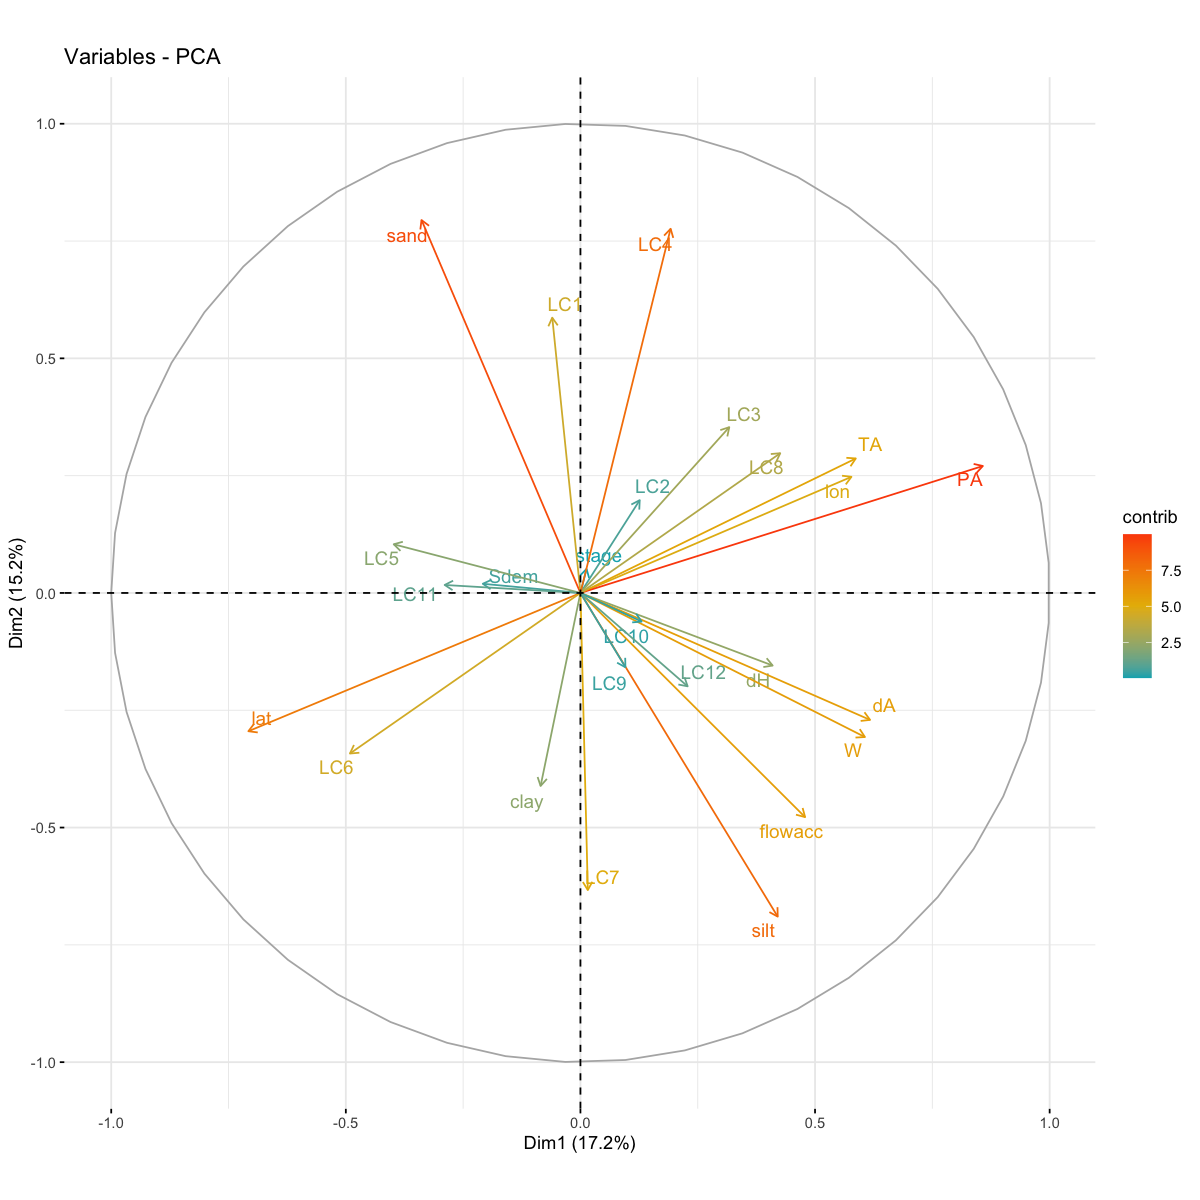

In [89]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,2), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(1,2), choix = "ind", habillage=1, select="contrib 5", unselect=0)

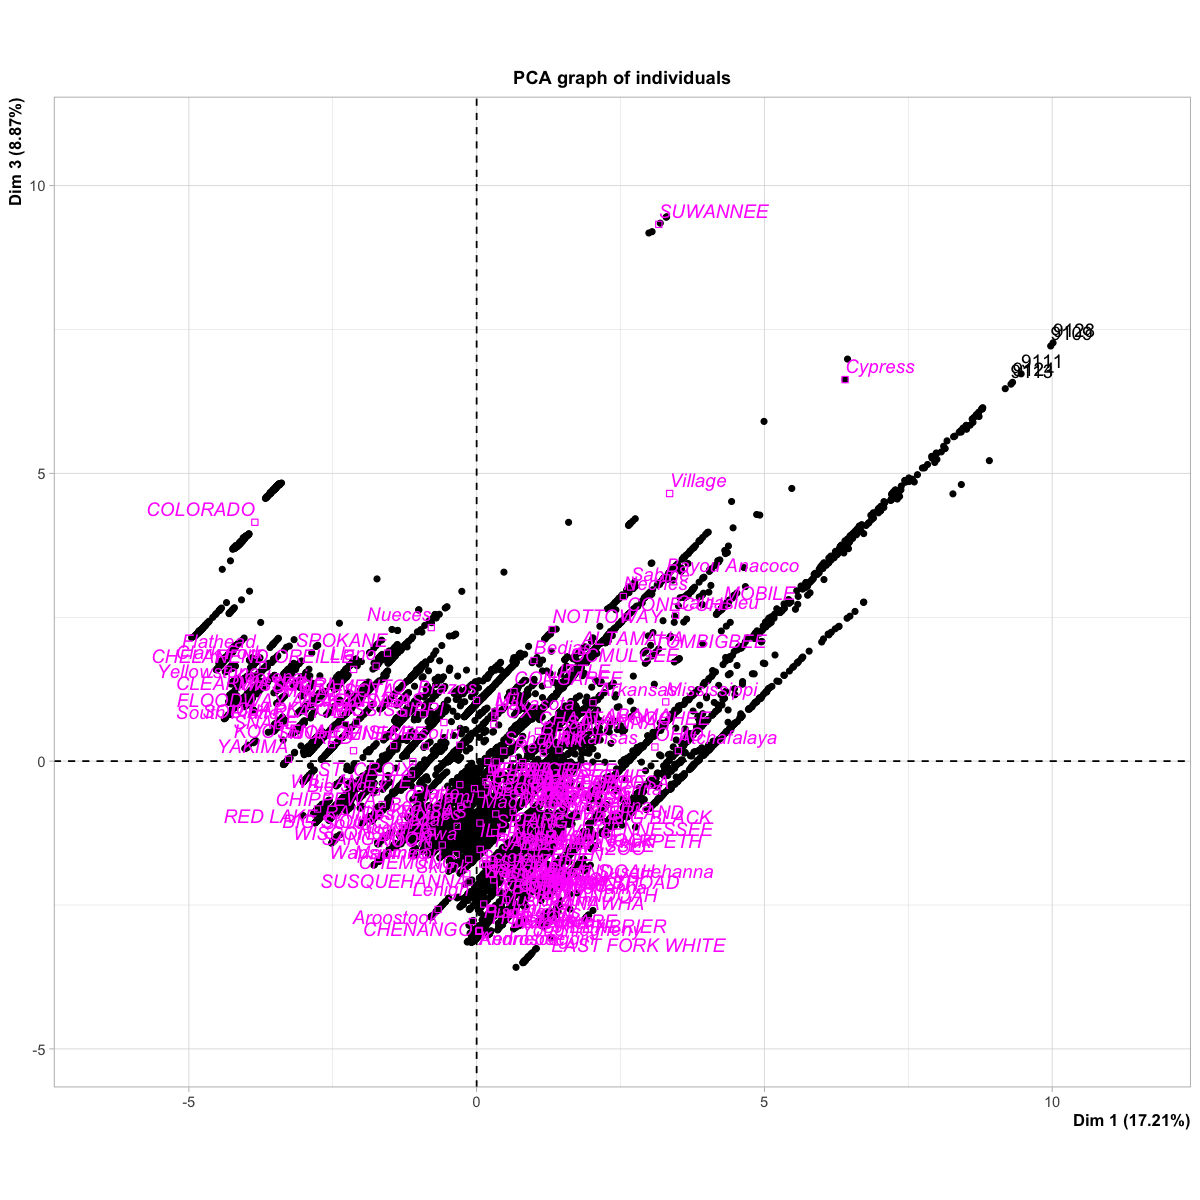

In [90]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,3), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(1,3), choix = "ind", select = "contrib 5", unselect = 0)

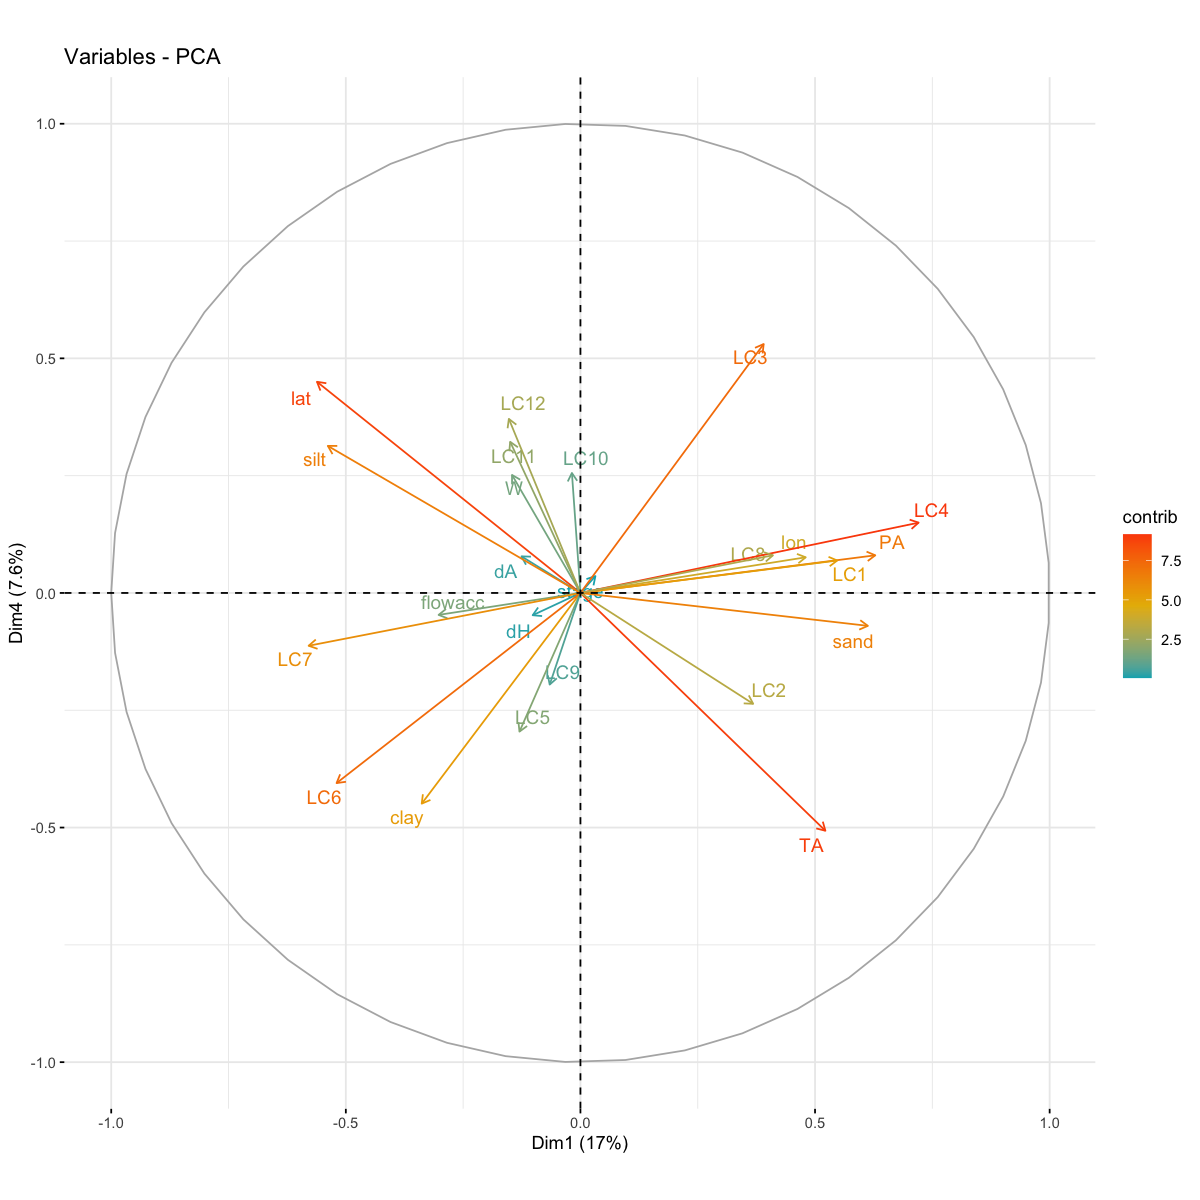

In [40]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,4), choix = "ind", select = "contrib 5", unselect = 0)

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,5), choix = "ind", select = "contrib 5", unselect = 0)

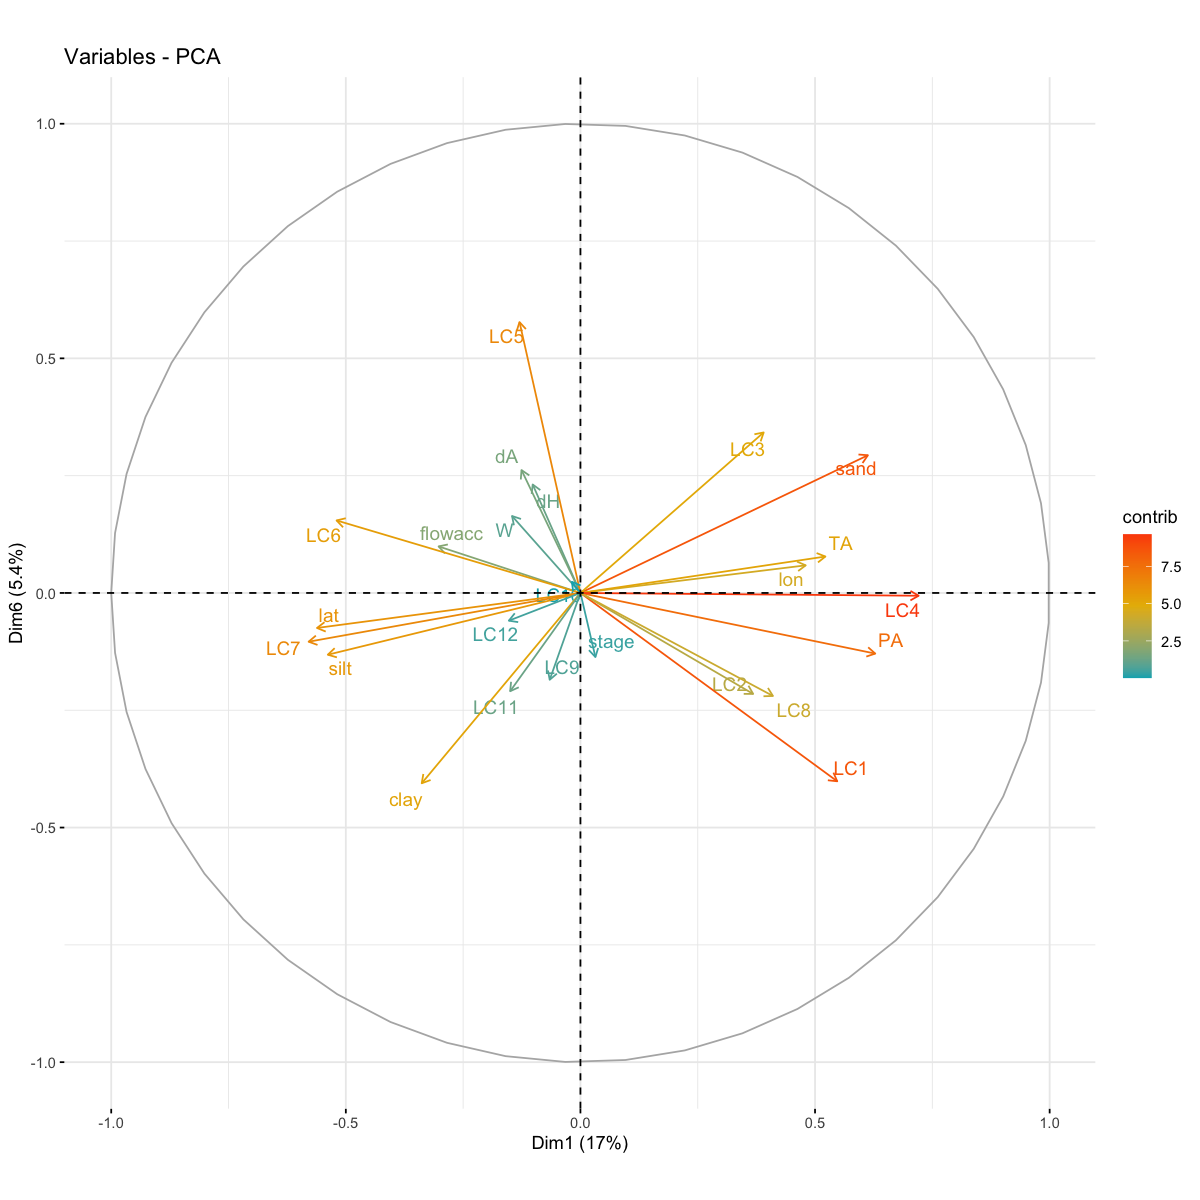

In [42]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,6), choix = "ind", select = "contrib 5", unselect = 0)

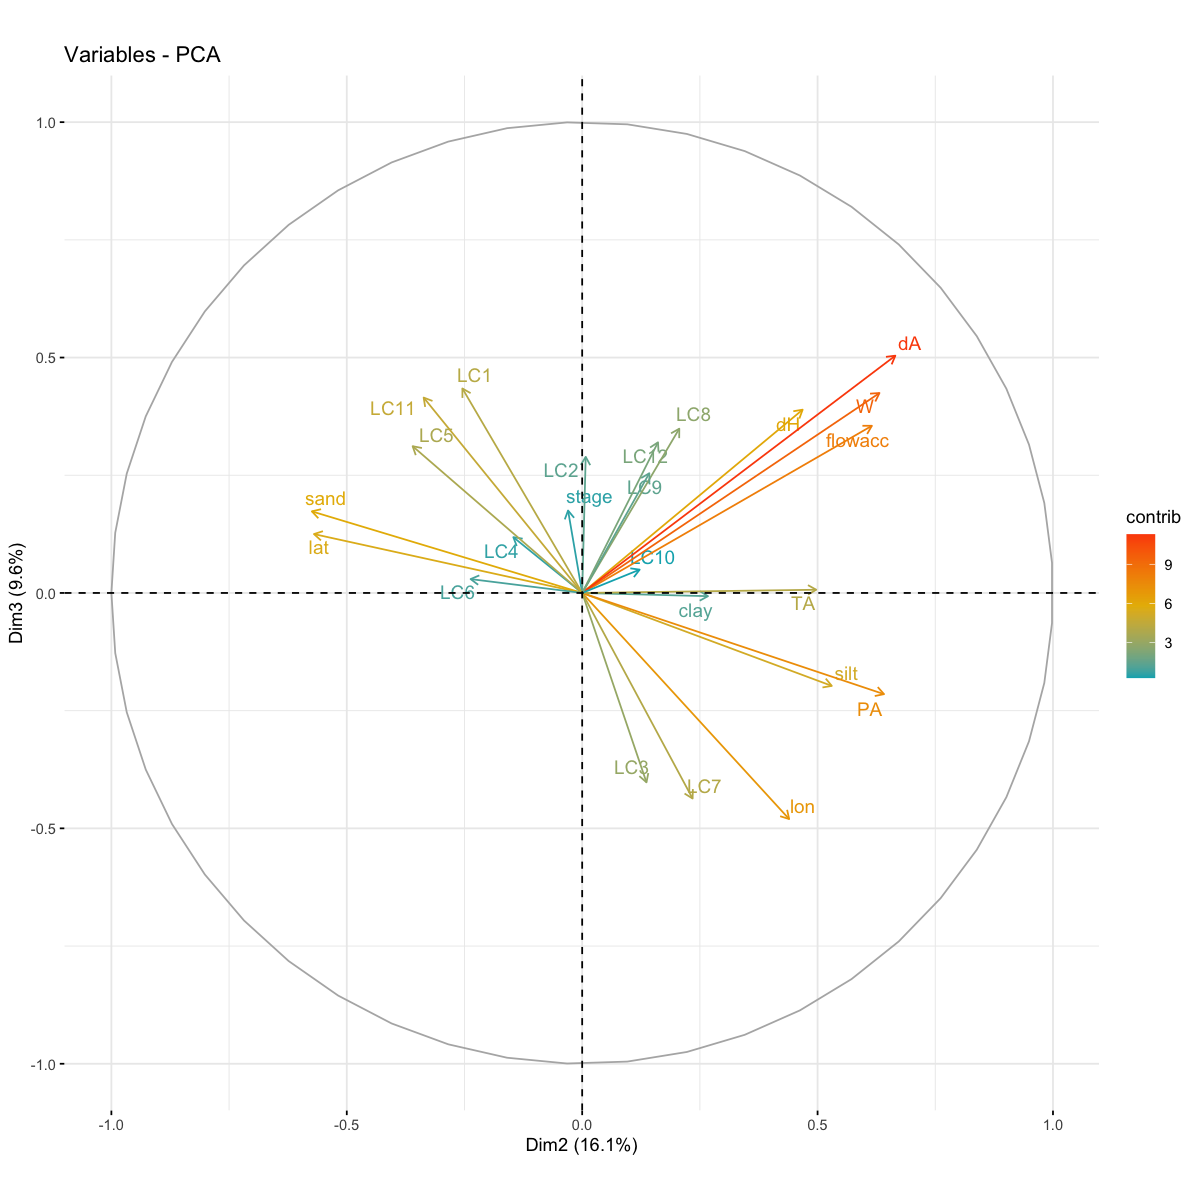

In [56]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,3), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(2,3), choix = "ind", select = "contrib 5", unselect = 0)

In [44]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,4), choix = "ind", select = "contrib 5", unselect = 0)

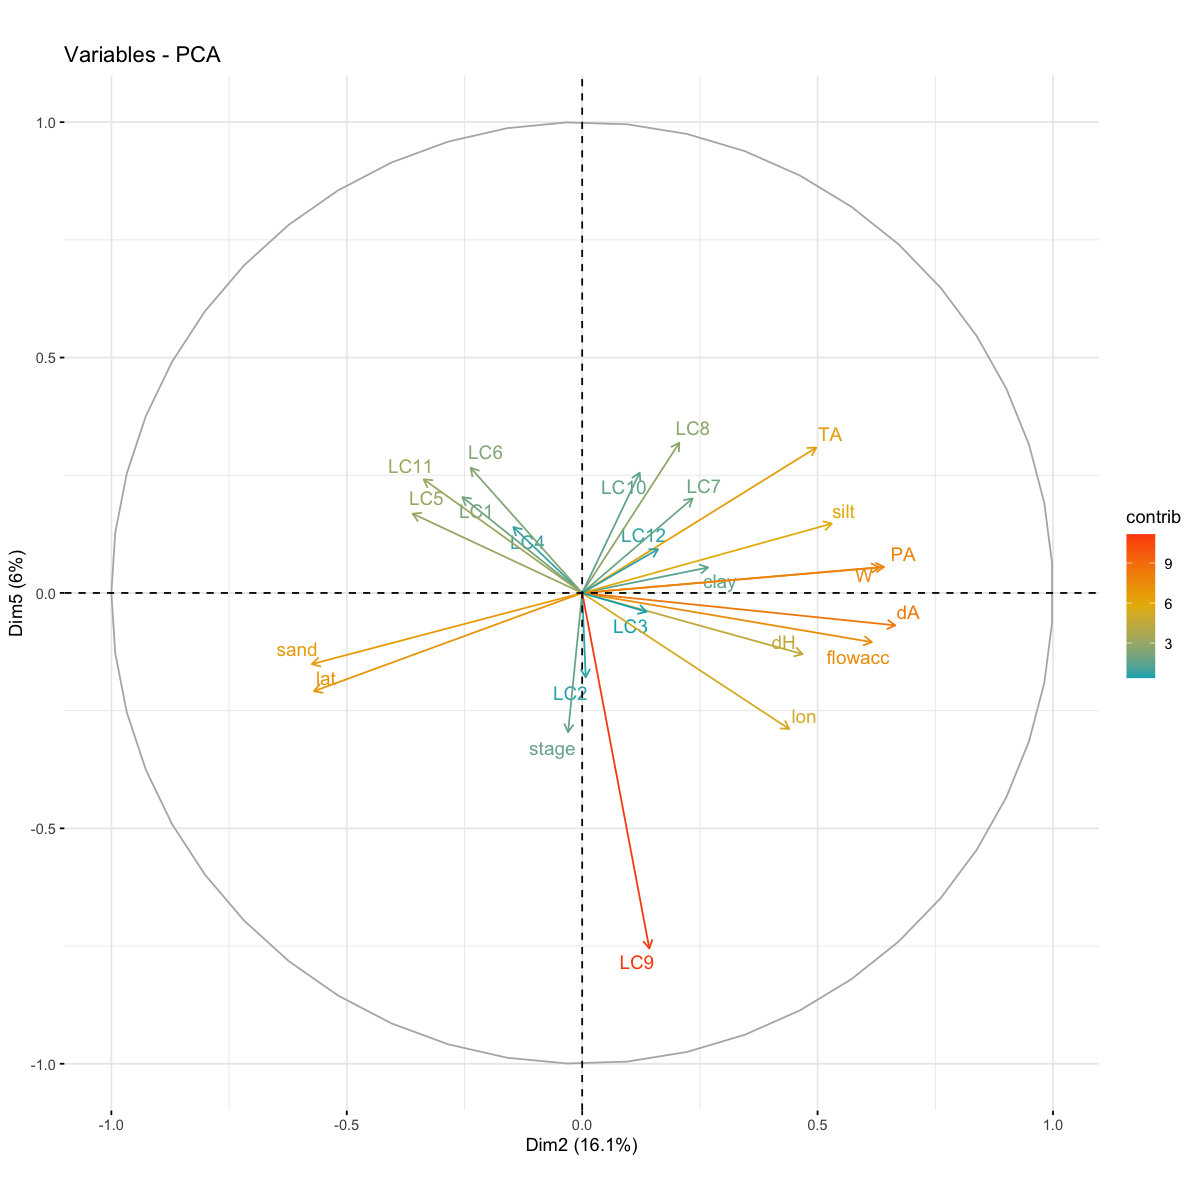

In [45]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,5), choix = "ind", select = "contrib 5", unselect = 0)

In [46]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,6), choix = "ind", select = "contrib 5", unselect = 0)

In [47]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,4), choix = "ind", select = "contrib 5", unselect = 0)

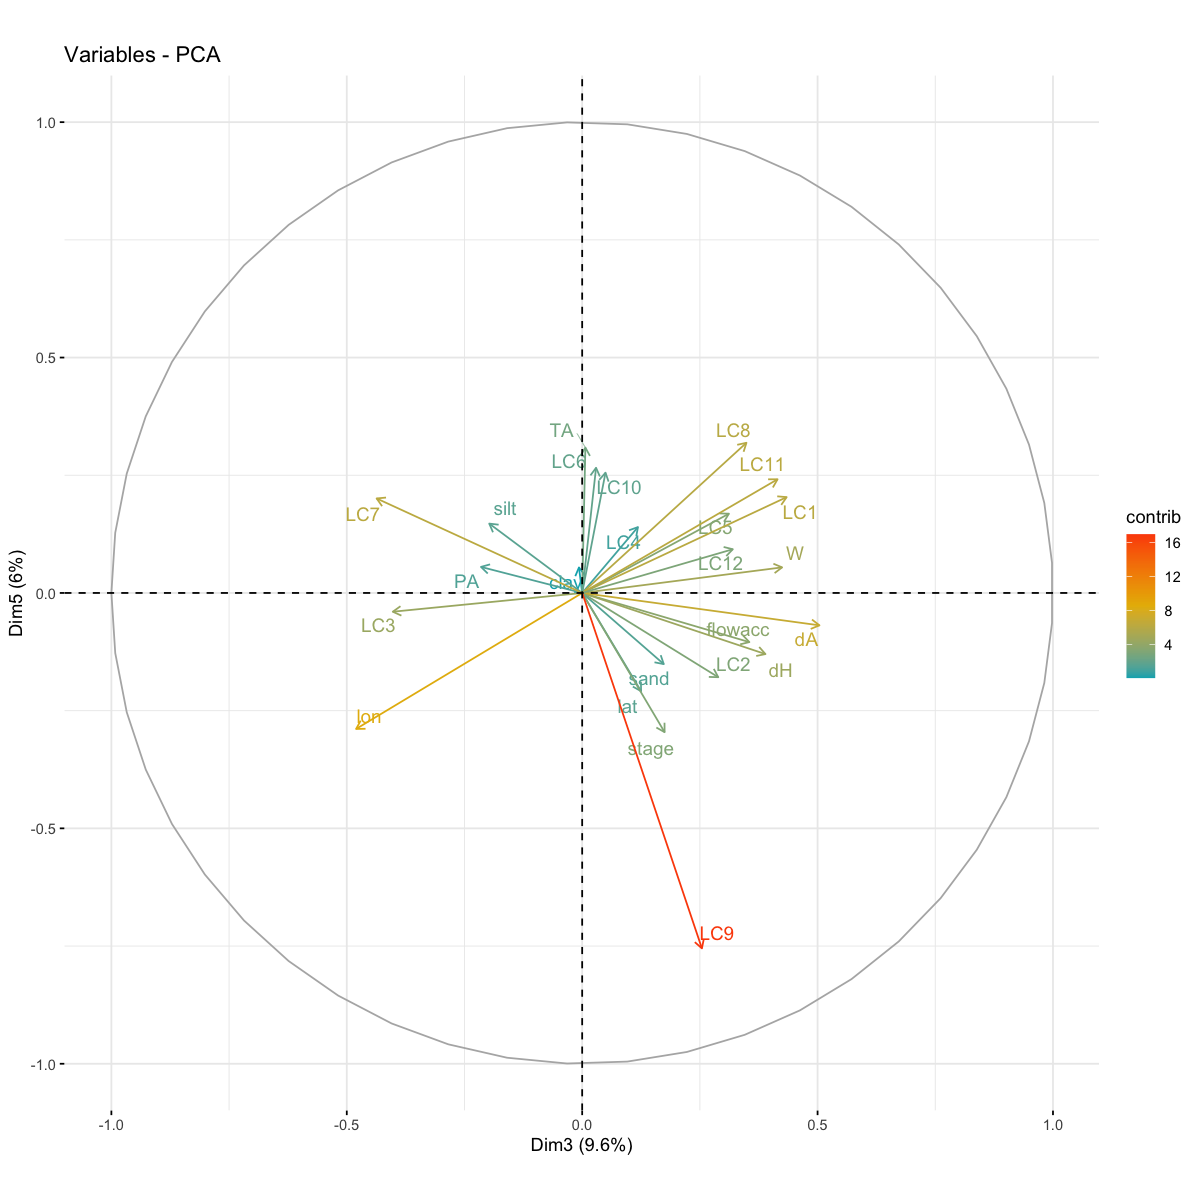

In [48]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,5), choix = "ind", select = "contrib 5", unselect = 0)

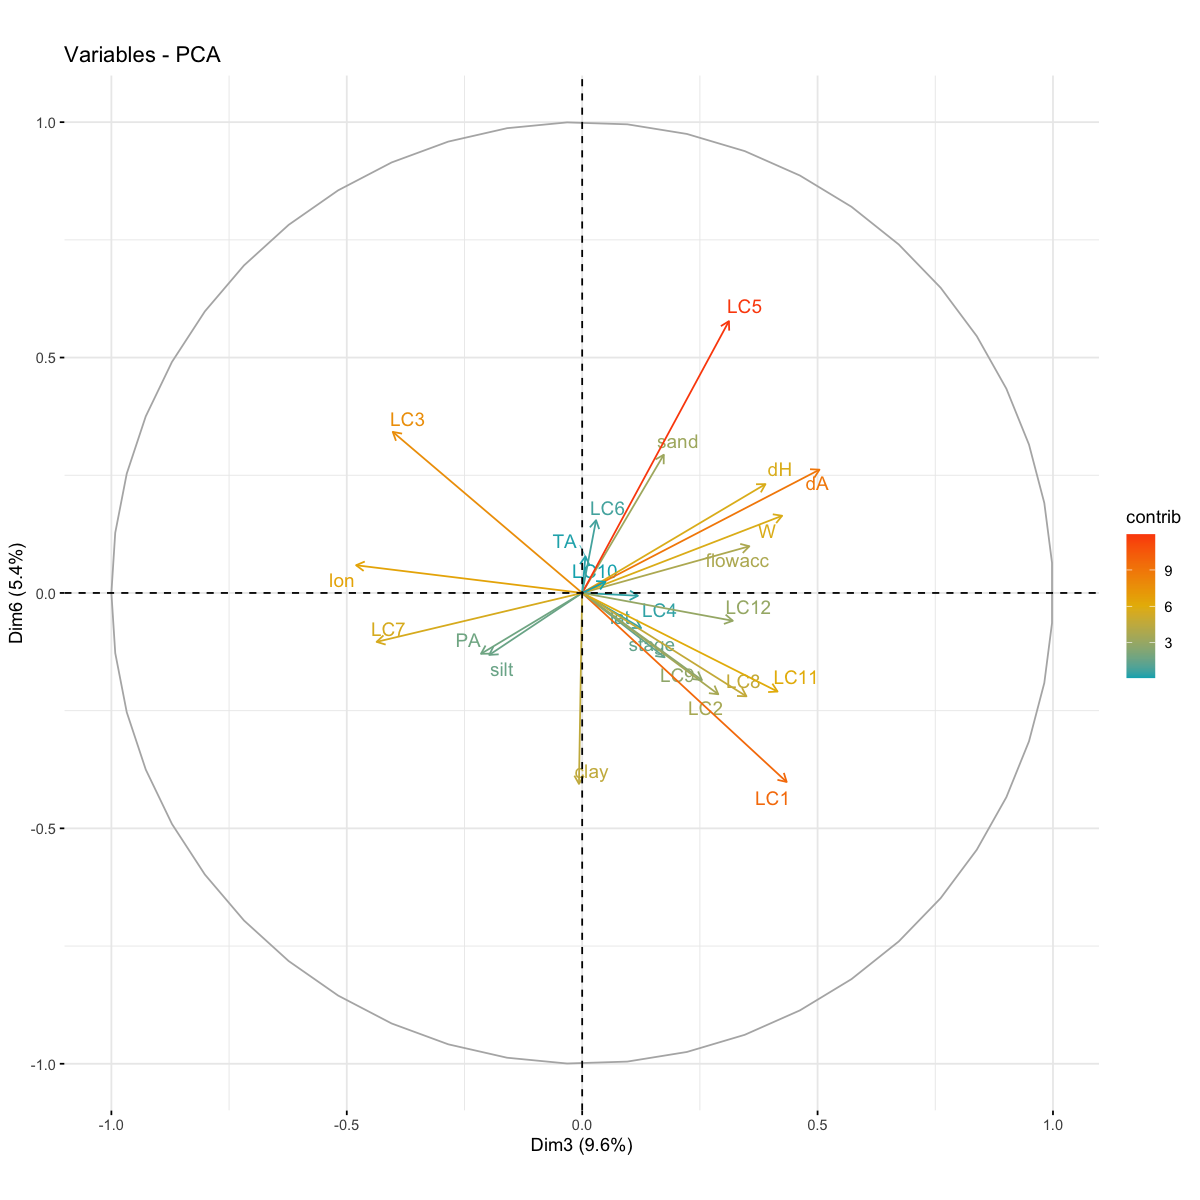

In [49]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,6), choix = "ind", select = "contrib 5", unselect = 0)

#### Conclusion(s)

- **Composante 1** : LC4, sand, PA, LC7. Donc principalement la composition de la rivière.
- **Composante 2** : flowacc, W, dA (+ un peu PA). Variables les plus corrélées avec le débit.
- **Composante 3** : dA. Rien de bien évident.
- **Comosantes 4, 5, & 6** : respectivement LC3(+ un peu TA), LC9, & LC5. Composition de la rivière.  

On repère aussi extrêmement facilement les différentes rivières sur les graphes des individus. Mais cela n'a pas de véritable intérêt dans notre recherche des paramètres influant le plus sur le débit. Juste que nos composantes permettent de bien différencier nos différents individus.